In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## Import required modules

In [11]:
import tensorflow as tf
import numpy as np
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import time
import random
from tensorflow import keras
from keras import layers

## MNIST dataset is loaded

In [65]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_train =x_train.shape[0]
n_test = x_test.shape[0]
print(f'{n_train=}')
print(f'{n_test=}')

n_train=60000
n_test=10000


### Scale data points

In [66]:
x_train, x_test = x_train / 127.5 -1, x_test / 127.5 -1

### Vectorize datapoints

In [4]:
nb_features = np.prod(x_train.shape[1:])
x_train.resize((n_train, nb_features))
x_test.resize((n_test, nb_features))

# Task 1. Data visualisation

In [5]:
print(f'{x_train.shape=}')
print(f'{x_test.shape=}')
print(f'{y_train.shape=}')
print(f'{y_test.shape=}')

x_train.shape=(60000, 784)
x_test.shape=(10000, 784)
y_train.shape=(60000,)
y_test.shape=(10000,)


In [19]:
pca = PCA()
x_train_t = pca.fit_transform(x_train)

In [20]:
print(f'{x_train_t[:,0].shape=}')
print(f'{x_train_t[:,1].shape=}')

x_train_t[:,0].shape=(60000,)
x_train_t[:,1].shape=(60000,)


x_train_t[:,0].shape=(60000,)
x_train_t[:,1].shape=(60000,)
type(x_train_t[:,0])=<class 'numpy.ndarray'>
type(x_train_t[:,1])=<class 'numpy.ndarray'>


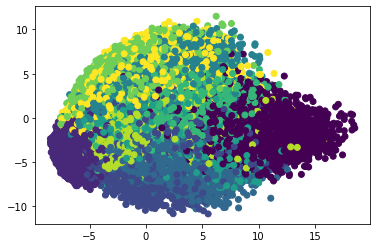

In [25]:
print(f'{x_train_t[:,0].shape=}')
print(f'{x_train_t[:,1].shape=}')
print(f'{type(x_train_t[:,0])=}')
print(f'{type(x_train_t[:,1])=}')
plot = plt.scatter(x_train_t[:,0], x_train_t[:,1], c=y_train)
plt.show()

## Data is not linearly separable

# Task 2. Perceptrons

## Preprocess data for training

In [30]:
cond = (y_train == 0) + (y_train == 1)
cond_test = (y_test == 0) + (y_test == 1)

binary_x_train = x_train[cond,:]
binary_y_train = y_train[cond]*1.
binary_x_test = x_test[cond_test,:]
binary_y_test = y_test[cond_test]*1.


binary_y_train[binary_y_train == 0] = -1
binary_y_train[binary_y_train == 1] = 1
binary_y_test[binary_y_test == 0] = -1
binary_y_test[binary_y_test == 1] = 1


In [32]:
print(f'{binary_x_train.shape=}')
print(f'{binary_y_train.shape=}')
print(f'{np.unique(binary_y_train)=}')

print('\n')

print(f'{binary_x_test.shape=}')
print(f'{binary_y_test.shape=}')
print(f'{np.unique(binary_y_test)=}')

binary_x_train.shape=(12665, 784)
binary_y_train.shape=(12665,)
np.unique(binary_y_train)=array([-1.,  1.])


binary_x_test.shape=(2115, 784)
binary_y_test.shape=(2115,)
np.unique(binary_y_test)=array([-1.,  1.])


### Data preprocessing for pairs of digits

In [42]:
def extract_pair_of_digits_data(x_train, x_test, y_train, 
                                y_test, digit1, digit2):
    
    cond = (y_train == digit1) + (y_train == digit2)
    cond_test = (y_test == digit1) + (y_test == digit2)

    binary_x_train = x_train[cond,:]
    binary_y_train = y_train[cond]*1.
    binary_x_test = x_test[cond_test,:]
    binary_y_test = y_test[cond_test]*1.


    binary_y_train[binary_y_train == digit1] = -1
    binary_y_train[binary_y_train == digit2] = 1
    binary_y_test[binary_y_test == digit1] = -1
    binary_y_test[binary_y_test == digit2] = 1
    
    return binary_x_train, binary_x_test, binary_y_train, binary_y_test

## Implement the required functions for the Single Layer Perceptron

### Activation function

In [22]:
def activation_function(pred):
    """
    """
    if pred >= 0:
        return 1
    return -1

### Predict function

In [23]:
def predict(x, w, b):
    """
    
    """
    prediction = np.dot(w, x) + b
    prediction = activation_function(prediction)
    
    return prediction

### Forward Propagation

In [24]:
def forward_propagation(x, y, w, b): 
    """
    x: training data as a vector (nparray), where each value corresponds
        to a feature
    y: label
    w: weights of the perceptron
    b: bias
    """
    y_pred = predict(x, w, b)
    loss = (y-y_pred)**2   
    d_loss = -2*(y-y_pred) 
    
    return y_pred, loss, d_loss

### Backpropagation

In [25]:
def backpropagation(x, w, d_loss):
    """
    
    """
    partial_derivates = list()
    for feature_value in x:
        partial_derivates.append(d_loss*feature_value)
        
    return partial_derivates    

### Optimize by using SGD

In [26]:
def optimize(x, y):
    iteration = 0
    error = np.inf
    n, m = x.shape
    w = np.random.rand(m)
    b = np.random.rand()
    
    learning_rate = 0.001
    errors = []
    iter_results = []
    
    while (iteration <= 1000) and (error > 1e-3):
        
        loss_ = 0
        for i in range(n):
            
            # Forward Propagation on each data point
            y_pred, loss, d_loss = forward_propagation(x[i], y[i], w, b)

            # Backpropagation
            partial_derivates = backpropagation(x[i], w, d_loss)
            
            # Learn by updating the weights of the perceptron
            w = w - (learning_rate * np.array(partial_derivates))

        # Evaluate the results
        for ind, feature_value_test in enumerate(x):
            y_pred, loss, d_loss = forward_propagation(feature_value_test, y[ind], w, b)
            loss_ += loss

        errors.append(loss_/len(x))
        error = errors[-1]
        iter_results.append(iteration)
        iteration += 1

        print('Train loss at the end of {} iteration is : {}'.format(iteration, 
                                                                 errors[-1]))

    
    return w, b, error, errors

In [27]:
w, b, error, errors = optimize(binary_x_train, binary_y_train)

Train loss at the end of 1 iteration is : 0.013896565337544414
Train loss at the end of 2 iteration is : 0.007579944729569681
Train loss at the end of 3 iteration is : 0.007264113699170943
Train loss at the end of 4 iteration is : 0.006000789577575997
Train loss at the end of 5 iteration is : 0.005053296486379787
Train loss at the end of 6 iteration is : 0.00473746545598105
Train loss at the end of 7 iteration is : 0.006000789577575997
Train loss at the end of 8 iteration is : 0.005369127516778523
Train loss at the end of 9 iteration is : 0.006316620607974733
Train loss at the end of 10 iteration is : 0.0028424792735886302
Train loss at the end of 11 iteration is : 0.0034741413343861035
Train loss at the end of 12 iteration is : 0.0028424792735886302
Train loss at the end of 13 iteration is : 0.0028424792735886302
Train loss at the end of 14 iteration is : 0.0034741413343861035
Train loss at the end of 15 iteration is : 0.0028424792735886302
Train loss at the end of 16 iteration is : 0

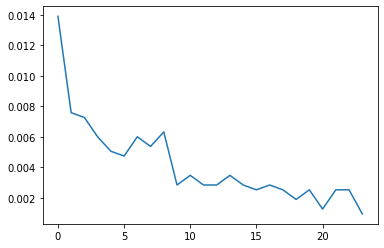

In [28]:
plot = plt.plot(range(len(errors)), errors)
plt.show()

### Calculate classification accuracy

In [47]:
def calculate_accuracy(x_test, y_test, w, b):
    
    # Initialize True Positive, True Negative, False Positive and False Negative
    tp, tn, fp, fn = 0, 0, 0, 0

    for sample, label in zip(x_test, y_test):

        prediction = predict(sample, w, b)

        if prediction == label:
            if prediction == 1:
                tp += 1
            else:
                tn += 1
        else:
            if prediction == 1:
                fp += 1
            else:
                fn += 1

    accuracy = (tp + tn)/(tp + tn + fp + fn)
    return accuracy
            
    

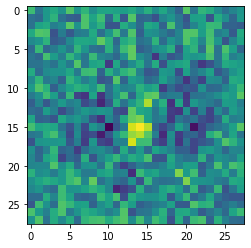

In [15]:
w.resize((28, 28))
plt.imshow(w)


### Train & Test with different digit pairs

#### Pair combination 1: 0 and 8

In [43]:
x_train_08, x_test_08, y_train_08, y_test_08 = extract_pair_of_digits_data(x_train, x_test, y_train, 
                                                               y_test, 0, 8)

print(f'{x_train_08.shape=}')
print(f'{y_train_08.shape=}')
print(f'{np.unique(y_train_08)=}')

print('\n')

print(f'{x_test_08.shape=}')
print(f'{y_test_08.shape=}')
print(f'{np.unique(y_test_08)=}')

x_train_08.shape=(11774, 784)
y_train_08.shape=(11774,)
np.unique(y_train_08)=array([-1.,  1.])


x_test_08.shape=(1954, 784)
y_test_08.shape=(1954,)
np.unique(y_test_08)=array([-1.,  1.])


In [44]:
w_08, b_08, error_08, errors_08 = optimize(x_train_08, y_train_08)

Train loss at the end of 1 iteration is : 0.04994054696789536
Train loss at the end of 2 iteration is : 0.039748598607100394
Train loss at the end of 3 iteration is : 0.04110752505520639
Train loss at the end of 4 iteration is : 0.03804994054696789
Train loss at the end of 5 iteration is : 0.037370477322914895
Train loss at the end of 6 iteration is : 0.037370477322914895
Train loss at the end of 7 iteration is : 0.03261423475454391
Train loss at the end of 8 iteration is : 0.05843383726855784
Train loss at the end of 9 iteration is : 0.04926108374384237
Train loss at the end of 10 iteration is : 0.053677594700186855
Train loss at the end of 11 iteration is : 0.03329369797859691
Train loss at the end of 12 iteration is : 0.04518430439952437
Train loss at the end of 13 iteration is : 0.04110752505520639
Train loss at the end of 14 iteration is : 0.0713436385255648
Train loss at the end of 15 iteration is : 0.03125530830643791
Train loss at the end of 16 iteration is : 0.0489213521318158

Train loss at the end of 131 iteration is : 0.027178528962119926
Train loss at the end of 132 iteration is : 0.033973161202649906
Train loss at the end of 133 iteration is : 0.03295396636657041
Train loss at the end of 134 iteration is : 0.012570069644980466
Train loss at the end of 135 iteration is : 0.05129947341600136
Train loss at the end of 136 iteration is : 0.04484457278749788
Train loss at the end of 137 iteration is : 0.04756242568370987
Train loss at the end of 138 iteration is : 0.043145914727365384
Train loss at the end of 139 iteration is : 0.05639544759639885
Train loss at the end of 140 iteration is : 0.010531679972821471
Train loss at the end of 141 iteration is : 0.03431289281467641
Train loss at the end of 142 iteration is : 0.05333786308816035
Train loss at the end of 143 iteration is : 0.055715984372345845
Train loss at the end of 144 iteration is : 0.05062001019194836
Train loss at the end of 145 iteration is : 0.04926108374384237
Train loss at the end of 146 itera

Train loss at the end of 259 iteration is : 0.010531679972821471
Train loss at the end of 260 iteration is : 0.0360115508748089
Train loss at the end of 261 iteration is : 0.010531679972821471
Train loss at the end of 262 iteration is : 0.010531679972821471
Train loss at the end of 263 iteration is : 0.034992356038729404
Train loss at the end of 264 iteration is : 0.011550874808900968
Train loss at the end of 265 iteration is : 0.02581960251401393
Train loss at the end of 266 iteration is : 0.011890606420927468
Train loss at the end of 267 iteration is : 0.04518430439952437
Train loss at the end of 268 iteration is : 0.04042806183115339
Train loss at the end of 269 iteration is : 0.011550874808900968
Train loss at the end of 270 iteration is : 0.04008833021912689
Train loss at the end of 271 iteration is : 0.009852216748768473
Train loss at the end of 272 iteration is : 0.01087141158484797
Train loss at the end of 273 iteration is : 0.011890606420927468
Train loss at the end of 274 ite

Train loss at the end of 386 iteration is : 0.012909801257006965
Train loss at the end of 387 iteration is : 0.009852216748768473
Train loss at the end of 388 iteration is : 0.02887718702225242
Train loss at the end of 389 iteration is : 0.01087141158484797
Train loss at the end of 390 iteration is : 0.009512485136741973
Train loss at the end of 391 iteration is : 0.01460845931713946
Train loss at the end of 392 iteration is : 0.04008833021912689
Train loss at the end of 393 iteration is : 0.02989638185833192
Train loss at the end of 394 iteration is : 0.022762018005775438
Train loss at the end of 395 iteration is : 0.028197723798199424
Train loss at the end of 396 iteration is : 0.012909801257006965
Train loss at the end of 397 iteration is : 0.009512485136741973
Train loss at the end of 398 iteration is : 0.01087141158484797
Train loss at the end of 399 iteration is : 0.014268727705112961
Train loss at the end of 400 iteration is : 0.041786988279259384
Train loss at the end of 401 it

Train loss at the end of 513 iteration is : 0.010191948360794971
Train loss at the end of 514 iteration is : 0.007134363852556481
Train loss at the end of 515 iteration is : 0.007134363852556481
Train loss at the end of 516 iteration is : 0.007813827076609478
Train loss at the end of 517 iteration is : 0.008493290300662476
Train loss at the end of 518 iteration is : 0.006115169016476983
Train loss at the end of 519 iteration is : 0.031595039918464414
Train loss at the end of 520 iteration is : 0.019704433497536946
Train loss at the end of 521 iteration is : 0.02921691863427892
Train loss at the end of 522 iteration is : 0.00747409546458298
Train loss at the end of 523 iteration is : 0.008153558688635978
Train loss at the end of 524 iteration is : 0.019364701885510448
Train loss at the end of 525 iteration is : 0.03431289281467641
Train loss at the end of 526 iteration is : 0.006115169016476983
Train loss at the end of 527 iteration is : 0.007134363852556481
Train loss at the end of 528

Train loss at the end of 640 iteration is : 0.014268727705112961
Train loss at the end of 641 iteration is : 0.015627654153218956
Train loss at the end of 642 iteration is : 0.013249532869033463
Train loss at the end of 643 iteration is : 0.011550874808900968
Train loss at the end of 644 iteration is : 0.015287922541192458
Train loss at the end of 645 iteration is : 0.012230338032953966
Train loss at the end of 646 iteration is : 0.009852216748768473
Train loss at the end of 647 iteration is : 0.01087141158484797
Train loss at the end of 648 iteration is : 0.012909801257006965
Train loss at the end of 649 iteration is : 0.015967385765245454
Train loss at the end of 650 iteration is : 0.011890606420927468
Train loss at the end of 651 iteration is : 0.013249532869033463
Train loss at the end of 652 iteration is : 0.01732631221335145
Train loss at the end of 653 iteration is : 0.013589264481059963
Train loss at the end of 654 iteration is : 0.016986580601324953
Train loss at the end of 65

Train loss at the end of 766 iteration is : 0.004076779344317989
Train loss at the end of 767 iteration is : 0.00373704773229149
Train loss at the end of 768 iteration is : 0.01732631221335145
Train loss at the end of 769 iteration is : 0.005435705792423985
Train loss at the end of 770 iteration is : 0.0027178528962119924
Train loss at the end of 771 iteration is : 0.004076779344317989
Train loss at the end of 772 iteration is : 0.0033973161202649907
Train loss at the end of 773 iteration is : 0.0067946322405299815
Train loss at the end of 774 iteration is : 0.0033973161202649907
Train loss at the end of 775 iteration is : 0.004076779344317989
Train loss at the end of 776 iteration is : 0.012909801257006965
Train loss at the end of 777 iteration is : 0.007813827076609478
Train loss at the end of 778 iteration is : 0.005775437404450484
Train loss at the end of 779 iteration is : 0.004076779344317989
Train loss at the end of 780 iteration is : 0.0023781212841854932
Train loss at the end 

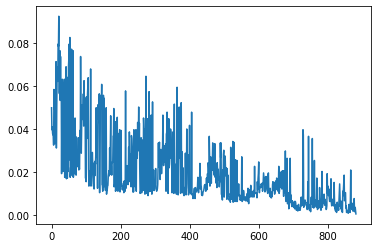

In [45]:
plot = plt.plot(range(len(errors_08)), errors_08)
plt.show()

In [49]:
accuracy_08 = calculate_accuracy(x_test_08, y_test_08, w_08, b_08)
print(accuracy_08)

0.9897645854657113


#### Pair combination 2: 1 and 7

In [50]:
x_train_17, x_test_17, y_train_17, y_test_17 = extract_pair_of_digits_data(x_train, x_test, y_train, 
                                                               y_test, 1, 7)

print(f'{x_train_17.shape=}')
print(f'{y_train_17.shape=}')
print(f'{np.unique(y_train_17)=}')

print('\n')

print(f'{x_test_17.shape=}')
print(f'{y_test_17.shape=}')
print(f'{np.unique(y_test_17)=}')

x_train_17.shape=(13007, 784)
y_train_17.shape=(13007,)
np.unique(y_train_17)=array([-1.,  1.])


x_test_17.shape=(2163, 784)
y_test_17.shape=(2163,)
np.unique(y_test_17)=array([-1.,  1.])


In [51]:
w_17, b_17, error_17, errors_17 = optimize(x_train_17, y_train_17)

Train loss at the end of 1 iteration is : 0.06550319058968247
Train loss at the end of 2 iteration is : 0.03013761820558161
Train loss at the end of 3 iteration is : 0.022141923579610978
Train loss at the end of 4 iteration is : 0.01691396940109172
Train loss at the end of 5 iteration is : 0.030445144921965095
Train loss at the end of 6 iteration is : 0.03013761820558161
Train loss at the end of 7 iteration is : 0.028907511340047667
Train loss at the end of 8 iteration is : 0.01476128238640732
Train loss at the end of 9 iteration is : 0.014453755670023834
Train loss at the end of 10 iteration is : 0.014453755670023834
Train loss at the end of 11 iteration is : 0.017221496117475206
Train loss at the end of 12 iteration is : 0.023372030445144923
Train loss at the end of 13 iteration is : 0.011378488506188975
Train loss at the end of 14 iteration is : 0.011070961789805489
Train loss at the end of 15 iteration is : 0.011378488506188975
Train loss at the end of 16 iteration is : 0.009840854

Train loss at the end of 129 iteration is : 0.011070961789805489
Train loss at the end of 130 iteration is : 0.009225801491504574
Train loss at the end of 131 iteration is : 0.008303221342354117
Train loss at the end of 132 iteration is : 0.00953332820788806
Train loss at the end of 133 iteration is : 0.010148381640655032
Train loss at the end of 134 iteration is : 0.011686015222572461
Train loss at the end of 135 iteration is : 0.011070961789805489
Train loss at the end of 136 iteration is : 0.0043053740293688015
Train loss at the end of 137 iteration is : 0.006458061044053202
Train loss at the end of 138 iteration is : 0.01537633581917429
Train loss at the end of 139 iteration is : 0.01476128238640732
Train loss at the end of 140 iteration is : 0.0024602137310678865
Train loss at the end of 141 iteration is : 0.019374183132159606
Train loss at the end of 142 iteration is : 0.003382793880218344
Train loss at the end of 143 iteration is : 0.0021526870146844007
Train loss at the end of 

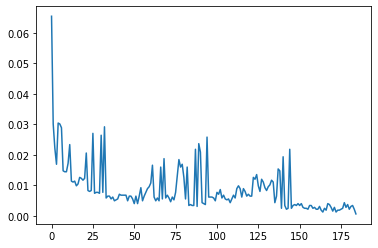

In [58]:
plot = plt.plot(range(len(errors_17)), errors_17)
plt.show()

In [59]:
accuracy_17 = calculate_accuracy(x_test_17, y_test_17, w_17, b_17)
print(accuracy_17)

0.9935275080906149


#### Pair combination 3: 4 and 9

In [52]:
x_train_49, x_test_49, y_train_49, y_test_49 = extract_pair_of_digits_data(x_train, x_test, y_train, 
                                                               y_test, 4, 9)

print(f'{x_train_49.shape=}')
print(f'{y_train_49.shape=}')
print(f'{np.unique(y_train_49)=}')

print('\n')

print(f'{x_test_49.shape=}')
print(f'{y_test_49.shape=}')
print(f'{np.unique(y_test_49)=}')

x_train_49.shape=(11791, 784)
y_train_49.shape=(11791,)
np.unique(y_train_49)=array([-1.,  1.])


x_test_49.shape=(1991, 784)
y_test_49.shape=(1991,)
np.unique(y_test_49)=array([-1.,  1.])


In [53]:
w_49, b_49, error_49, errors_49 = optimize(x_train_49, y_train_49)

Train loss at the end of 1 iteration is : 0.19268933932660504
Train loss at the end of 2 iteration is : 0.185226019845645
Train loss at the end of 3 iteration is : 0.1835298108726995
Train loss at the end of 4 iteration is : 0.13603595963022644
Train loss at the end of 5 iteration is : 0.21066915443982698
Train loss at the end of 6 iteration is : 0.13298278347892462
Train loss at the end of 7 iteration is : 0.12823339835467729
Train loss at the end of 8 iteration is : 0.23679077262318718
Train loss at the end of 9 iteration is : 0.13535747604104825
Train loss at the end of 10 iteration is : 0.15130184038673564
Train loss at the end of 11 iteration is : 0.24764651005003815
Train loss at the end of 12 iteration is : 0.10923585785768807
Train loss at the end of 13 iteration is : 0.12687643117632091
Train loss at the end of 14 iteration is : 0.27580357900093294
Train loss at the end of 15 iteration is : 0.11194979221440081
Train loss at the end of 16 iteration is : 0.12653718938173183
Trai

Train loss at the end of 132 iteration is : 0.09871936222542617
Train loss at the end of 133 iteration is : 0.09939784581460435
Train loss at the end of 134 iteration is : 0.10109405478754982
Train loss at the end of 135 iteration is : 0.0970231532524807
Train loss at the end of 136 iteration is : 0.10041557119837163
Train loss at the end of 137 iteration is : 0.15130184038673564
Train loss at the end of 138 iteration is : 0.17233483165125943
Train loss at the end of 139 iteration is : 0.1075396488847426
Train loss at the end of 140 iteration is : 0.15808667627851752
Train loss at the end of 141 iteration is : 0.11364600118734629
Train loss at the end of 142 iteration is : 0.1075396488847426
Train loss at the end of 143 iteration is : 0.14621321346789926
Train loss at the end of 144 iteration is : 0.1326435416843355
Train loss at the end of 145 iteration is : 0.112628275803579
Train loss at the end of 146 iteration is : 0.10652192350097532
Train loss at the end of 147 iteration is : 0.

Train loss at the end of 261 iteration is : 0.10821813247392079
Train loss at the end of 262 iteration is : 0.12043083707912815
Train loss at the end of 263 iteration is : 0.1027902637604953
Train loss at the end of 264 iteration is : 0.12110932066830633
Train loss at the end of 265 iteration is : 0.12551946399796454
Train loss at the end of 266 iteration is : 0.10923585785768807
Train loss at the end of 267 iteration is : 0.1078788906793317
Train loss at the end of 268 iteration is : 0.1027902637604953
Train loss at the end of 269 iteration is : 0.09804087863624798
Train loss at the end of 270 iteration is : 0.0926130099228225
Train loss at the end of 271 iteration is : 0.09464846069035705
Train loss at the end of 272 iteration is : 0.09498770248494615
Train loss at the end of 273 iteration is : 0.09939784581460435
Train loss at the end of 274 iteration is : 0.09464846069035705
Train loss at the end of 275 iteration is : 0.09464846069035705
Train loss at the end of 276 iteration is : 

Train loss at the end of 390 iteration is : 0.11975235348994996
Train loss at the end of 391 iteration is : 0.09464846069035705
Train loss at the end of 392 iteration is : 0.0926130099228225
Train loss at the end of 393 iteration is : 0.09363073530658977
Train loss at the end of 394 iteration is : 0.09804087863624798
Train loss at the end of 395 iteration is : 0.09668391145789161
Train loss at the end of 396 iteration is : 0.09193452633364431
Train loss at the end of 397 iteration is : 0.09838012043083708
Train loss at the end of 398 iteration is : 0.09668391145789161
Train loss at the end of 399 iteration is : 0.09634466966330252
Train loss at the end of 400 iteration is : 0.10041557119837163
Train loss at the end of 401 iteration is : 0.13298278347892462
Train loss at the end of 402 iteration is : 0.09770163684165889
Train loss at the end of 403 iteration is : 0.09668391145789161
Train loss at the end of 404 iteration is : 0.09566618607412433
Train loss at the end of 405 iteration is

Train loss at the end of 519 iteration is : 0.09159528453905522
Train loss at the end of 520 iteration is : 0.11432448477652447
Train loss at the end of 521 iteration is : 0.10007632940378254
Train loss at the end of 522 iteration is : 0.11500296836570266
Train loss at the end of 523 iteration is : 0.12959036553303366
Train loss at the end of 524 iteration is : 0.10855737426850988
Train loss at the end of 525 iteration is : 0.10516495632261895
Train loss at the end of 526 iteration is : 0.09396997710117887
Train loss at the end of 527 iteration is : 0.10211178017131711
Train loss at the end of 528 iteration is : 0.09566618607412433
Train loss at the end of 529 iteration is : 0.09329149351200068
Train loss at the end of 530 iteration is : 0.09498770248494615
Train loss at the end of 531 iteration is : 0.09193452633364431
Train loss at the end of 532 iteration is : 0.09532694427953524
Train loss at the end of 533 iteration is : 0.10312950555508439
Train loss at the end of 534 iteration i

Train loss at the end of 648 iteration is : 0.1180561445170045
Train loss at the end of 649 iteration is : 0.10041557119837163
Train loss at the end of 650 iteration is : 0.10041557119837163
Train loss at the end of 651 iteration is : 0.09498770248494615
Train loss at the end of 652 iteration is : 0.11161055041981172
Train loss at the end of 653 iteration is : 0.1177169027224154
Train loss at the end of 654 iteration is : 0.09193452633364431
Train loss at the end of 655 iteration is : 0.10414723093885167
Train loss at the end of 656 iteration is : 0.09363073530658977
Train loss at the end of 657 iteration is : 0.0922737681282334
Train loss at the end of 658 iteration is : 0.09430921889576796
Train loss at the end of 659 iteration is : 0.09396997710117887
Train loss at the end of 660 iteration is : 0.10855737426850988
Train loss at the end of 661 iteration is : 0.09295225171741159
Train loss at the end of 662 iteration is : 0.10414723093885167
Train loss at the end of 663 iteration is :

Train loss at the end of 777 iteration is : 0.0922737681282334
Train loss at the end of 778 iteration is : 0.09295225171741159
Train loss at the end of 779 iteration is : 0.0926130099228225
Train loss at the end of 780 iteration is : 0.09329149351200068
Train loss at the end of 781 iteration is : 0.09464846069035705
Train loss at the end of 782 iteration is : 0.09600542786871342
Train loss at the end of 783 iteration is : 0.09464846069035705
Train loss at the end of 784 iteration is : 0.09498770248494615
Train loss at the end of 785 iteration is : 0.09430921889576796
Train loss at the end of 786 iteration is : 0.09363073530658977
Train loss at the end of 787 iteration is : 0.0970231532524807
Train loss at the end of 788 iteration is : 0.09668391145789161
Train loss at the end of 789 iteration is : 0.0926130099228225
Train loss at the end of 790 iteration is : 0.09329149351200068
Train loss at the end of 791 iteration is : 0.09634466966330252
Train loss at the end of 792 iteration is : 

Train loss at the end of 906 iteration is : 0.11398524298193538
Train loss at the end of 907 iteration is : 0.10991434144686625
Train loss at the end of 908 iteration is : 0.13060809091680095
Train loss at the end of 909 iteration is : 0.10177253837672802
Train loss at the end of 910 iteration is : 0.10855737426850988
Train loss at the end of 911 iteration is : 0.11907386990077178
Train loss at the end of 912 iteration is : 0.10550419811720804
Train loss at the end of 913 iteration is : 0.10109405478754982
Train loss at the end of 914 iteration is : 0.10312950555508439
Train loss at the end of 915 iteration is : 0.11398524298193538
Train loss at the end of 916 iteration is : 0.0970231532524807
Train loss at the end of 917 iteration is : 0.1024510219659062
Train loss at the end of 918 iteration is : 0.09804087863624798
Train loss at the end of 919 iteration is : 0.10346874734967348
Train loss at the end of 920 iteration is : 0.09634466966330252
Train loss at the end of 921 iteration is 

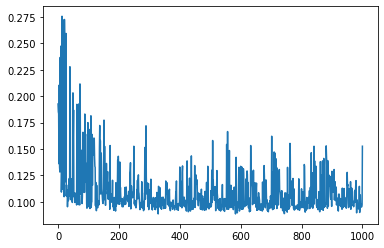

In [60]:
plot = plt.plot(range(len(errors_49)), errors_49)
plt.show()

In [61]:
accuracy_49 = calculate_accuracy(x_test_49, y_test_49, w_49, b_49)
print(accuracy_49)

0.9532898041185334


#### Pair combination 4: 2 and 6

In [54]:
x_train_26, x_test_26, y_train_26, y_test_26 = extract_pair_of_digits_data(x_train, x_test, y_train, 
                                                               y_test, 2, 6)

print(f'{x_train_26.shape=}')
print(f'{y_train_26.shape=}')
print(f'{np.unique(y_train_26)=}')

print('\n')

print(f'{x_test_26.shape=}')
print(f'{y_test_26.shape=}')
print(f'{np.unique(y_test_26)=}')

x_train_26.shape=(11876, 784)
y_train_26.shape=(11876,)
np.unique(y_train_26)=array([-1.,  1.])


x_test_26.shape=(1990, 784)
y_test_26.shape=(1990,)
np.unique(y_test_26)=array([-1.,  1.])


In [55]:
w_26, b_26, error_26, errors_26 = optimize(x_train_26, y_train_26)

Train loss at the end of 1 iteration is : 0.12327382957224654
Train loss at the end of 2 iteration is : 0.11182216234422364
Train loss at the end of 3 iteration is : 0.16672280229033345
Train loss at the end of 4 iteration is : 0.09666554395419333
Train loss at the end of 5 iteration is : 0.08959245537217919
Train loss at the end of 6 iteration is : 0.07106769956214214
Train loss at the end of 7 iteration is : 0.05591108117211182
Train loss at the end of 8 iteration is : 0.06365779723812731
Train loss at the end of 9 iteration is : 0.06972044459413944
Train loss at the end of 10 iteration is : 0.052206130010104414
Train loss at the end of 11 iteration is : 0.05658470865611317
Train loss at the end of 12 iteration is : 0.08016167059616032
Train loss at the end of 13 iteration is : 0.049511620074099025
Train loss at the end of 14 iteration is : 0.06096328730212193
Train loss at the end of 15 iteration is : 0.05119568878410239
Train loss at the end of 16 iteration is : 0.04513304142809026

Train loss at the end of 131 iteration is : 0.08622431795217245
Train loss at the end of 132 iteration is : 0.0549006399461098
Train loss at the end of 133 iteration is : 0.030986864264061973
Train loss at the end of 134 iteration is : 0.029976423038059953
Train loss at the end of 135 iteration is : 0.036375884136072754
Train loss at the end of 136 iteration is : 0.044796227686089596
Train loss at the end of 137 iteration is : 0.10070730885820141
Train loss at the end of 138 iteration is : 0.03233411923206467
Train loss at the end of 139 iteration is : 0.08117211182216234
Train loss at the end of 140 iteration is : 0.03166049174806332
Train loss at the end of 141 iteration is : 0.10138093634220276
Train loss at the end of 142 iteration is : 0.10710676995621421
Train loss at the end of 143 iteration is : 0.10879083866621758
Train loss at the end of 144 iteration is : 0.033681374200067365
Train loss at the end of 145 iteration is : 0.028965981812057933
Train loss at the end of 146 iterat

Train loss at the end of 259 iteration is : 0.07713034691815426
Train loss at the end of 260 iteration is : 0.07140451330414281
Train loss at the end of 261 iteration is : 0.05591108117211182
Train loss at the end of 262 iteration is : 0.03199730549006399
Train loss at the end of 263 iteration is : 0.03199730549006399
Train loss at the end of 264 iteration is : 0.06803637588413607
Train loss at the end of 265 iteration is : 0.06399461098012799
Train loss at the end of 266 iteration is : 0.08757157292017514
Train loss at the end of 267 iteration is : 0.0434489727180869
Train loss at the end of 268 iteration is : 0.054227012462108454
Train loss at the end of 269 iteration is : 0.09632873021219265
Train loss at the end of 270 iteration is : 0.05119568878410239
Train loss at the end of 271 iteration is : 0.05826877736611654
Train loss at the end of 272 iteration is : 0.06365779723812731
Train loss at the end of 273 iteration is : 0.04816436510609633
Train loss at the end of 274 iteration i

Train loss at the end of 387 iteration is : 0.029976423038059953
Train loss at the end of 388 iteration is : 0.02862916807005726
Train loss at the end of 389 iteration is : 0.04580666891209161
Train loss at the end of 390 iteration is : 0.03873358033007747
Train loss at the end of 391 iteration is : 0.039744021556079485
Train loss at the end of 392 iteration is : 0.037049511620074096
Train loss at the end of 393 iteration is : 0.04412260020208825
Train loss at the end of 394 iteration is : 0.02963960929605928
Train loss at the end of 395 iteration is : 0.04075446278208151
Train loss at the end of 396 iteration is : 0.02963960929605928
Train loss at the end of 397 iteration is : 0.047490737622094985
Train loss at the end of 398 iteration is : 0.050185247558100374
Train loss at the end of 399 iteration is : 0.04210171775008421
Train loss at the end of 400 iteration is : 0.02963960929605928
Train loss at the end of 401 iteration is : 0.04816436510609633
Train loss at the end of 402 iterat

Train loss at the end of 515 iteration is : 0.06837318962613674
Train loss at the end of 516 iteration is : 0.06534186594813068
Train loss at the end of 517 iteration is : 0.07005725833614011
Train loss at the end of 518 iteration is : 0.02795554058605591
Train loss at the end of 519 iteration is : 0.06096328730212193
Train loss at the end of 520 iteration is : 0.06837318962613674
Train loss at the end of 521 iteration is : 0.05860559110811721
Train loss at the end of 522 iteration is : 0.025597844392051195
Train loss at the end of 523 iteration is : 0.07443583698214887
Train loss at the end of 524 iteration is : 0.02761872684405524
Train loss at the end of 525 iteration is : 0.07140451330414281
Train loss at the end of 526 iteration is : 0.0613001010441226
Train loss at the end of 527 iteration is : 0.07746716066015494
Train loss at the end of 528 iteration is : 0.08016167059616032
Train loss at the end of 529 iteration is : 0.07005725833614011
Train loss at the end of 530 iteration i

Train loss at the end of 643 iteration is : 0.03907039407207814
Train loss at the end of 644 iteration is : 0.035028629168070056
Train loss at the end of 645 iteration is : 0.028292354328056584
Train loss at the end of 646 iteration is : 0.057931963624115866
Train loss at the end of 647 iteration is : 0.0434489727180869
Train loss at the end of 648 iteration is : 0.03435500168406871
Train loss at the end of 649 iteration is : 0.040417649040080834
Train loss at the end of 650 iteration is : 0.0855506904681711
Train loss at the end of 651 iteration is : 0.07342539575614684
Train loss at the end of 652 iteration is : 0.08218255304816437
Train loss at the end of 653 iteration is : 0.050185247558100374
Train loss at the end of 654 iteration is : 0.04176490400808353
Train loss at the end of 655 iteration is : 0.05321657123610643
Train loss at the end of 656 iteration is : 0.05591108117211182
Train loss at the end of 657 iteration is : 0.07005725833614011
Train loss at the end of 658 iteratio

Train loss at the end of 771 iteration is : 0.05591108117211182
Train loss at the end of 772 iteration is : 0.040417649040080834
Train loss at the end of 773 iteration is : 0.06096328730212193
Train loss at the end of 774 iteration is : 0.05557426743011115
Train loss at the end of 775 iteration is : 0.05692152239811384
Train loss at the end of 776 iteration is : 0.0613001010441226
Train loss at the end of 777 iteration is : 0.03603907039407208
Train loss at the end of 778 iteration is : 0.0434489727180869
Train loss at the end of 779 iteration is : 0.04782755136409565
Train loss at the end of 780 iteration is : 0.06231054227012462
Train loss at the end of 781 iteration is : 0.04176490400808353
Train loss at the end of 782 iteration is : 0.05725833614011452
Train loss at the end of 783 iteration is : 0.059952846076119906
Train loss at the end of 784 iteration is : 0.05456382620410913
Train loss at the end of 785 iteration is : 0.07106769956214214
Train loss at the end of 786 iteration i

Train loss at the end of 899 iteration is : 0.03401818794206803
Train loss at the end of 900 iteration is : 0.037723139104075445
Train loss at the end of 901 iteration is : 0.06837318962613674
Train loss at the end of 902 iteration is : 0.07881441562815762
Train loss at the end of 903 iteration is : 0.08858201414617717
Train loss at the end of 904 iteration is : 0.07073088582014146
Train loss at the end of 905 iteration is : 0.06298416975412596
Train loss at the end of 906 iteration is : 0.08150892556416302
Train loss at the end of 907 iteration is : 0.07308858201414618
Train loss at the end of 908 iteration is : 0.06938363085213876
Train loss at the end of 909 iteration is : 0.02761872684405524
Train loss at the end of 910 iteration is : 0.02963960929605928
Train loss at the end of 911 iteration is : 0.04378578646008757
Train loss at the end of 912 iteration is : 0.04142809026608286
Train loss at the end of 913 iteration is : 0.04075446278208151
Train loss at the end of 914 iteration 

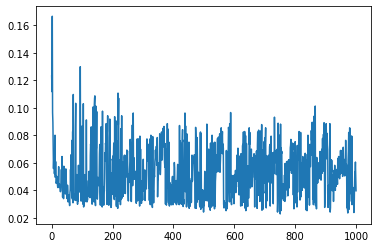

In [62]:
plot = plt.plot(range(len(errors_26)), errors_26)
plt.show()

In [63]:
accuracy_26 = calculate_accuracy(x_test_26, y_test_26, w_26, b_26)
print(accuracy_26)

0.9778894472361809


#### Pair combination 5: 3 and 5

In [56]:
x_train_35, x_test_35, y_train_35, y_test_35 = extract_pair_of_digits_data(x_train, x_test, y_train, 
                                                               y_test, 3, 5)

print(f'{x_train_35.shape=}')
print(f'{y_train_35.shape=}')
print(f'{np.unique(y_train_35)=}')

print('\n')

print(f'{x_test_35.shape=}')
print(f'{y_test_35.shape=}')
print(f'{np.unique(y_test_35)=}')

x_train_35.shape=(11552, 784)
y_train_35.shape=(11552,)
np.unique(y_train_35)=array([-1.,  1.])


x_test_35.shape=(1902, 784)
y_test_35.shape=(1902,)
np.unique(y_test_35)=array([-1.,  1.])


In [57]:
w_35, b_35, error_35, errors_35 = optimize(x_train_35, y_train_35)

Train loss at the end of 1 iteration is : 0.1994459833795014
Train loss at the end of 2 iteration is : 0.18940443213296398
Train loss at the end of 3 iteration is : 0.17209141274238227
Train loss at the end of 4 iteration is : 0.16897506925207756
Train loss at the end of 5 iteration is : 0.1634349030470914
Train loss at the end of 6 iteration is : 0.16412742382271467
Train loss at the end of 7 iteration is : 0.16066481994459833
Train loss at the end of 8 iteration is : 0.1481994459833795
Train loss at the end of 9 iteration is : 0.2098337950138504
Train loss at the end of 10 iteration is : 0.15270083102493076
Train loss at the end of 11 iteration is : 0.26385041551246535
Train loss at the end of 12 iteration is : 0.14854570637119113
Train loss at the end of 13 iteration is : 0.14439058171745153
Train loss at the end of 14 iteration is : 0.14750692520775624
Train loss at the end of 15 iteration is : 0.2330332409972299
Train loss at the end of 16 iteration is : 0.14854570637119113
Train 

Train loss at the end of 132 iteration is : 0.3396814404432133
Train loss at the end of 133 iteration is : 0.1281163434903047
Train loss at the end of 134 iteration is : 0.16759002770083103
Train loss at the end of 135 iteration is : 0.15408587257617729
Train loss at the end of 136 iteration is : 0.14681440443213298
Train loss at the end of 137 iteration is : 0.13954293628808864
Train loss at the end of 138 iteration is : 0.1340027700831025
Train loss at the end of 139 iteration is : 0.1523545706371191
Train loss at the end of 140 iteration is : 0.1623961218836565
Train loss at the end of 141 iteration is : 0.14162049861495846
Train loss at the end of 142 iteration is : 0.15373961218836565
Train loss at the end of 143 iteration is : 0.13885041551246538
Train loss at the end of 144 iteration is : 0.16689750692520774
Train loss at the end of 145 iteration is : 0.13781163434903046
Train loss at the end of 146 iteration is : 0.15027700831024932
Train loss at the end of 147 iteration is : 0

Train loss at the end of 261 iteration is : 0.13123268698060941
Train loss at the end of 262 iteration is : 0.16585872576177285
Train loss at the end of 263 iteration is : 0.1513157894736842
Train loss at the end of 264 iteration is : 0.1481994459833795
Train loss at the end of 265 iteration is : 0.16378116343490304
Train loss at the end of 266 iteration is : 0.1592797783933518
Train loss at the end of 267 iteration is : 0.16793628808864267
Train loss at the end of 268 iteration is : 0.14750692520775624
Train loss at the end of 269 iteration is : 0.15997229916897507
Train loss at the end of 270 iteration is : 0.15200831024930747
Train loss at the end of 271 iteration is : 0.15027700831024932
Train loss at the end of 272 iteration is : 0.1492382271468144
Train loss at the end of 273 iteration is : 0.14958448753462603
Train loss at the end of 274 iteration is : 0.13434903047091412
Train loss at the end of 275 iteration is : 0.15373961218836565
Train loss at the end of 276 iteration is : 

Train loss at the end of 390 iteration is : 0.14369806094182824
Train loss at the end of 391 iteration is : 0.13781163434903046
Train loss at the end of 392 iteration is : 0.12534626038781163
Train loss at the end of 393 iteration is : 0.15581717451523547
Train loss at the end of 394 iteration is : 0.13642659279778394
Train loss at the end of 395 iteration is : 0.14646814404432132
Train loss at the end of 396 iteration is : 0.11807479224376731
Train loss at the end of 397 iteration is : 0.14993074792243768
Train loss at the end of 398 iteration is : 0.13123268698060941
Train loss at the end of 399 iteration is : 0.13365650969529086
Train loss at the end of 400 iteration is : 0.14058171745152354
Train loss at the end of 401 iteration is : 0.16274238227146814
Train loss at the end of 402 iteration is : 0.1329639889196676
Train loss at the end of 403 iteration is : 0.18386426592797783
Train loss at the end of 404 iteration is : 0.12777008310249308
Train loss at the end of 405 iteration is

Train loss at the end of 519 iteration is : 0.18975069252077562
Train loss at the end of 520 iteration is : 0.15581717451523547
Train loss at the end of 521 iteration is : 0.1513157894736842
Train loss at the end of 522 iteration is : 0.1804016620498615
Train loss at the end of 523 iteration is : 0.1835180055401662
Train loss at the end of 524 iteration is : 0.13850415512465375
Train loss at the end of 525 iteration is : 0.16412742382271467
Train loss at the end of 526 iteration is : 0.18628808864265928
Train loss at the end of 527 iteration is : 0.13850415512465375
Train loss at the end of 528 iteration is : 0.14854570637119113
Train loss at the end of 529 iteration is : 0.12534626038781163
Train loss at the end of 530 iteration is : 0.1987534626038781
Train loss at the end of 531 iteration is : 0.12707756232686981
Train loss at the end of 532 iteration is : 0.12465373961218837
Train loss at the end of 533 iteration is : 0.12569252077562326
Train loss at the end of 534 iteration is : 

Train loss at the end of 648 iteration is : 0.125
Train loss at the end of 649 iteration is : 0.1623961218836565
Train loss at the end of 650 iteration is : 0.1603185595567867
Train loss at the end of 651 iteration is : 0.17416897506925208
Train loss at the end of 652 iteration is : 0.15270083102493076
Train loss at the end of 653 iteration is : 0.21433518005540167
Train loss at the end of 654 iteration is : 0.1724376731301939
Train loss at the end of 655 iteration is : 0.1402354570637119
Train loss at the end of 656 iteration is : 0.15858725761772854
Train loss at the end of 657 iteration is : 0.16204986149584488
Train loss at the end of 658 iteration is : 0.12846260387811634
Train loss at the end of 659 iteration is : 0.21018005540166204
Train loss at the end of 660 iteration is : 0.1731301939058172
Train loss at the end of 661 iteration is : 0.17693905817174516
Train loss at the end of 662 iteration is : 0.16447368421052633
Train loss at the end of 663 iteration is : 0.2063711911357

Train loss at the end of 777 iteration is : 0.13469529085872575
Train loss at the end of 778 iteration is : 0.1554709141274238
Train loss at the end of 779 iteration is : 0.20394736842105263
Train loss at the end of 780 iteration is : 0.12880886426592797
Train loss at the end of 781 iteration is : 0.16862880886426593
Train loss at the end of 782 iteration is : 0.1554709141274238
Train loss at the end of 783 iteration is : 0.12396121883656509
Train loss at the end of 784 iteration is : 0.12222991689750692
Train loss at the end of 785 iteration is : 0.19009695290858725
Train loss at the end of 786 iteration is : 0.11842105263157894
Train loss at the end of 787 iteration is : 0.1260387811634349
Train loss at the end of 788 iteration is : 0.19286703601108032
Train loss at the end of 789 iteration is : 0.15166204986149584
Train loss at the end of 790 iteration is : 0.1298476454293629
Train loss at the end of 791 iteration is : 0.12673130193905818
Train loss at the end of 792 iteration is : 

Train loss at the end of 906 iteration is : 0.15997229916897507
Train loss at the end of 907 iteration is : 0.12880886426592797
Train loss at the end of 908 iteration is : 0.12430747922437674
Train loss at the end of 909 iteration is : 0.25727146814404434
Train loss at the end of 910 iteration is : 0.12777008310249308
Train loss at the end of 911 iteration is : 0.1904432132963989
Train loss at the end of 912 iteration is : 0.13054016620498615
Train loss at the end of 913 iteration is : 0.15893351800554018
Train loss at the end of 914 iteration is : 0.13088642659279778
Train loss at the end of 915 iteration is : 0.1530470914127424
Train loss at the end of 916 iteration is : 0.1814404432132964
Train loss at the end of 917 iteration is : 0.1793628808864266
Train loss at the end of 918 iteration is : 0.13815789473684212
Train loss at the end of 919 iteration is : 0.14889196675900276
Train loss at the end of 920 iteration is : 0.12673130193905818
Train loss at the end of 921 iteration is : 

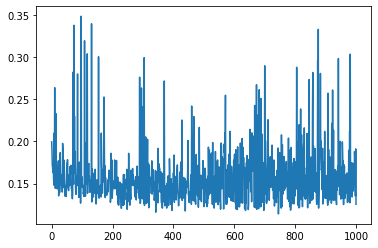

In [64]:
plot = plt.plot(range(len(errors_35)), errors_35)
plt.show()

In [65]:
accuracy_35 = calculate_accuracy(x_test_35, y_test_35, w_35, b_35)
print(accuracy_35)

0.9526813880126183


#### Compare all results

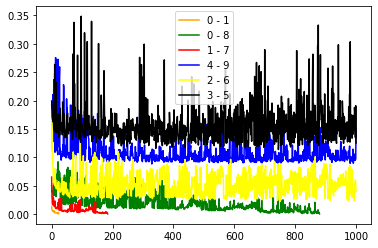

In [67]:
plt.plot(range(len(errors)), errors, 'orange', label='0 - 1')
plt.plot(range(len(errors_08)), errors_08, 'g', label='0 - 8')
plt.plot(range(len(errors_17)), errors_17, 'r', label='1 - 7')
plt.plot(range(len(errors_49)), errors_49, 'blue', label='4 - 9')
plt.plot(range(len(errors_26)), errors_26, 'yellow', label='2 - 6')
plt.plot(range(len(errors_35)), errors_35, 'black', label='3 - 5')

plt.legend()
plt.show()


# Task 3. Multi Layer Perceptron

## Preprocess data for training

In [5]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [6]:
print(f'{y_train.shape=}')
print(f'{y_test.shape=}')
print(f'{np.unique(y_train)=}')

y_train.shape=(60000, 10)
y_test.shape=(10000, 10)
np.unique(y_train)=array([0., 1.])


## Create MLP neural network

In [7]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units=784, input_dim=784, activation='relu'))
    model.add(Dense(units=1000, activation='relu'))
    model.add(Dense(units=1000, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))

    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=adam_optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['categorical_accuracy'])
    
    return model

### Define functions for parameter tuning

In [122]:
def fit_models_batch(x_train, y_train):
    
    learning_rates = [0.001, 0.002, 0.01, 0.02]
    batch_sizes = [8, 32, 64, 128]
    epochs = [5, 10, 15, 20]
    results = dict()
    counter = 0
    
    for learning_rate in learning_rates:
        model = create_model(learning_rate)
        for batch in batch_sizes:
            for epoch in epochs:
                counter += 1
                results[f'Model {counter}'] = {'configuration': [learning_rate, batch, epoch]}
                trained_model = model.fit(x_train, y_train, batch_size=batch,
                                          epochs=epoch, verbose=0)
                results[f'Model {counter}']['trained_model'] = trained_model
                
    return results

In [89]:
print(f'{x_train.shape=}')
print(f'{x_test.shape=}')

x_train.shape=(60000, 784)
x_test.shape=(10000, 784)


In [116]:
model = create_model(0.02)
trained_model = model.fit(x_train, y_train, batch_size=32, epochs=3, verbose=1)

Epoch 1/3
1875/1875 [==============================] - 13s 7ms/step - loss: 2.2999 - categorical_accuracy: 0.7506
Epoch 2/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6552 - categorical_accuracy: 0.8029
Epoch 3/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6697 - categorical_accuracy: 0.8076


In [118]:
results = model.evaluate(x_test, y_test, batch_size=100)
print(f'Results: {results}')

100/100 [==============================] - 0s 3ms/step - loss: 0.5645 - categorical_accuracy: 0.8350
Results: [0.5645412802696228, 0.8349999785423279]


In [117]:
a = model.predict(x_test)
print(a.shape)
preds = list()
for i in a:
    preds.append(i.argmax())
    
print(preds)

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 2, 4, 9, 6, 4, 5, 9, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 2, 1, 1, 7, 9, 2, 3, 5, 8, 6, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 5, 4, 2, 7, 5, 4, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 7, 9, 7, 7, 6, 2, 7, 5, 4, 7, 5, 6, 1, 3, 6, 9, 3, 1, 4, 2, 9, 0, 9, 6, 0, 5, 4, 9, 9, 2, 8, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 4, 5, 4, 7, 6, 9, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 4, 3, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 4, 2, 3, 0, 1, 1, 8, 0, 9, 0, 8, 1, 6, 9, 2, 3, 6, 1, 1, 1, 3, 8, 5, 2, 9, 4, 3, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 6, 3, 7, 7, 2, 2, 4, 1, 5, 5, 5, 7, 2, 5, 0, 6, 4, 2, 4, 4, 9, 5, 7, 7, 2, 8, 2, 0, 5, 3, 7, 7, 8, 1, 5, 1, 3, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 3, 4, 7, 1, 2, 9, 0, 2, 9, 4, 3, 3,

## Plot Training curve

<function matplotlib.pyplot.show(close=None, block=None)>

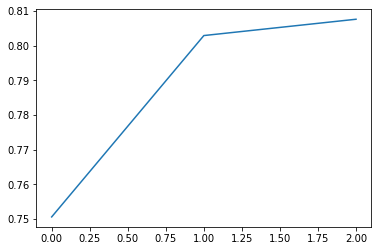

In [119]:
plot = plt.plot(range(len(trained_model.history['categorical_accuracy'])), trained_model.history['categorical_accuracy'])
plt.show

## Plot Test curve

In [ ]:
plot = plt.plot(range(len(trained_model.history['categorical_accuracy'])), trained_model.history['categorical_accuracy'])
plt.show

## Test different parameters

In [123]:
multiparameters_results = fit_models_batch(x_train, y_train)

In [124]:
print(multiparameters_results)

{'Model 1': {'configuration': [0.001, 8, 5], 'trained_model': <keras.callbacks.History object at 0x7f6d14191b50>}, 'Model 2': {'configuration': [0.001, 8, 10], 'trained_model': <keras.callbacks.History object at 0x7f6d607d4400>}, 'Model 3': {'configuration': [0.001, 8, 15], 'trained_model': <keras.callbacks.History object at 0x7f6d65fb9d90>}, 'Model 4': {'configuration': [0.001, 8, 20], 'trained_model': <keras.callbacks.History object at 0x7f6d65fd0460>}, 'Model 5': {'configuration': [0.001, 32, 5], 'trained_model': <keras.callbacks.History object at 0x7f6d65fefdf0>}, 'Model 6': {'configuration': [0.001, 32, 10], 'trained_model': <keras.callbacks.History object at 0x7f6d607d4280>}, 'Model 7': {'configuration': [0.001, 32, 15], 'trained_model': <keras.callbacks.History object at 0x7f6d65f3cd30>}, 'Model 8': {'configuration': [0.001, 32, 20], 'trained_model': <keras.callbacks.History object at 0x7f6d65f53820>}, 'Model 9': {'configuration': [0.001, 64, 5], 'trained_model': <keras.callback

In [128]:
for model in multiparameters_results.values():
    print('\n')
    print(f'{model["configuration"]=}')
    trained_model = model['trained_model']
    print(f'Accuracy: {trained_model.history["categorical_accuracy"][-1]}')
    



model["configuration"]=[0.001, 8, 5]
Accuracy: 0.9612500071525574


model["configuration"]=[0.001, 8, 10]
Accuracy: 0.9754166603088379


model["configuration"]=[0.001, 8, 15]
Accuracy: 0.9808333516120911


model["configuration"]=[0.001, 8, 20]
Accuracy: 0.9830666780471802


model["configuration"]=[0.001, 32, 5]
Accuracy: 0.9921666383743286


model["configuration"]=[0.001, 32, 10]
Accuracy: 0.9940666556358337


model["configuration"]=[0.001, 32, 15]
Accuracy: 0.9952999949455261


model["configuration"]=[0.001, 32, 20]
Accuracy: 0.996483325958252


model["configuration"]=[0.001, 64, 5]
Accuracy: 0.9983833432197571


model["configuration"]=[0.001, 64, 10]
Accuracy: 0.9981833100318909


model["configuration"]=[0.001, 64, 15]
Accuracy: 0.9978500008583069


model["configuration"]=[0.001, 64, 20]
Accuracy: 0.9982666373252869


model["configuration"]=[0.001, 128, 5]
Accuracy: 0.9993500113487244


model["configuration"]=[0.001, 128, 10]
Accuracy: 0.9995666742324829


model["configuration"]=[0

## Train models with more hidden layers, and different number of neurons per layer

According to the results obtained from the parameter tuning, the model shows a clear improvement when applying a bigger batch_size (optimal results for a batch size of 128, and worst results for low batch sizes), and also for a larger number of epochs, as expected. In spite of this, it is important to check that the model is not overfitting, by plotting the Accuracy vs Epoch curve. If the curve peaks in the first few epochs and practically does not improve its results for many epochs, it is very likely that the model is overfitting.

The model to be used has as parameters: 

- learning rate: 0.001
- batch size: 128
- epochs: 5/10/15/20 (chosen to vaoid overfitting)

The intention is to achieve the best accuracy for the smallest possible number of parameters, in the shortest possible execution time. Therefore, models with 3, 4, 5 and 6 hidden layers will be tested to see if it is worth the increase in parameters to achieve a significant improvement in accuracy. Furthermore, each model with n-hidden layers will be evaluated for 4 different combinations of number of neurons for each layer. Following the same principle as before, combinations with fewer and fewer neurons will be tested to see if the model achieves optimal accuracy with fewer neurons and thus fewer parameters.

### Model with 3 hidden layers [784, ?, ?, ?, 10]

In [49]:
def create_3_layer_model(neurons):
    
    model = Sequential()
    model.add(Dense(units=784, input_dim=784, activation='relu'))
    model.add(Dense(units=neurons[0], activation='relu'))
    model.add(Dense(units=neurons[1], activation='relu'))
    model.add(Dense(units=neurons[2], activation='relu'))
    model.add(Dense(units=10, activation='softmax'))

    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=adam_optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['categorical_accuracy'])
    
    return model

In [50]:
# We will try to optimize the number of parameters on the model, by
# checking if the accuracy decreases if the number of neurons is reduced
neurons_comb = [
    [1024, 512, 256],
    [512, 256, 128],
    [256, 128, 64],
    [128, 64, 32]
]

In [51]:
results_3 = list()
for neurons in neurons_comb:
    
    start = time.time()

    model = create_3_layer_model(neurons)
    history = model.fit(x_train, y_train, batch_size=128, epochs=10)
    evaluation = model.evaluate(x_test, y_test, batch_size=128)

    training_time = time.time() - start
    print(f"Training time: {training_time} seconds. Neurons:  {neurons}")
    
    results_3.append((training_time, neurons, evaluation, history))


Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2774 - categorical_accuracy: 0.9134
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1336 - categorical_accuracy: 0.9597
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1013 - categorical_accuracy: 0.9685
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0823 - categorical_accuracy: 0.9742
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0726 - categorical_accuracy: 0.9773
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0646 - categorical_accuracy: 0.9796
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0553 - categorical_accuracy: 0.9824
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0525 - categorical_accuracy: 0.9832
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0452 - categorical_accuracy:

Training results for [1024, 512, 256]: [0.08174286037683487, 0.9786999821662903] after 38.742647647857666 seconds
Training results for [512, 256, 128]: [0.07832948118448257, 0.9799000024795532] after 24.074079275131226 seconds
Training results for [256, 128, 64]: [0.09441588819026947, 0.9735000133514404] after 19.068995237350464 seconds
Training results for [128, 64, 32]: [0.09548169374465942, 0.9732999801635742] after 16.367411136627197 seconds


<function matplotlib.pyplot.show(close=None, block=None)>

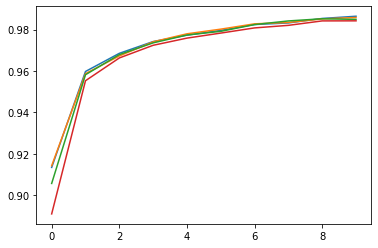

In [52]:
for training in results_3:
    print(f"Training results for {training[1]}: {training[2]} after {training[0]} seconds")
    plot = plt.plot(range(len(training[3].history['categorical_accuracy'])), training[3].history['categorical_accuracy'])
plt.show

### Model with 4 hidden layers [784, ?, ?, ?, ?, 10]

In [53]:
def create_4_layer_model(neurons):
    
    model = Sequential()
    model.add(Dense(units=784, input_dim=784, activation='relu'))
    model.add(Dense(units=neurons[0], activation='relu'))
    model.add(Dense(units=neurons[1], activation='relu'))
    model.add(Dense(units=neurons[2], activation='relu'))
    model.add(Dense(units=neurons[3], activation='relu'))
    model.add(Dense(units=10, activation='softmax'))

    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=adam_optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['categorical_accuracy'])
    
    return model

In [54]:
# We will try to optimize the number of parameters on the model, by
# checking if the accuracy decreases if the number of neurons is reduced
neurons_comb = [
    [1024, 512, 256, 128],
    [512, 256, 128, 64],
    [256, 128, 64, 32],
    [128, 64, 32, 16]
]

In [55]:
results_4 = list()
for neurons in neurons_comb:
    
    start = time.time()

    model = create_4_layer_model(neurons)
    history = model.fit(x_train, y_train, batch_size=128, epochs=10)
    evaluation = model.evaluate(x_test, y_test, batch_size=128)

    training_time = time.time() - start
    print(f"Training time: {training_time} seconds. Neurons:  {neurons}")
    
    results_4.append((training_time, neurons, evaluation, history))


Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2892 - categorical_accuracy: 0.9082
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1408 - categorical_accuracy: 0.9561
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1079 - categorical_accuracy: 0.9671
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0840 - categorical_accuracy: 0.9741
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0758 - categorical_accuracy: 0.9761
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0704 - categorical_accuracy: 0.9785
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0588 - categorical_accuracy: 0.9814
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0544 - categorical_accuracy: 0.9833
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0484 - categorical_accuracy:

Training results for [1024, 512, 256, 128]: [0.0900714322924614, 0.975600004196167] after 41.87104558944702 seconds
Training results for [512, 256, 128, 64]: [0.067100889980793, 0.9811000227928162] after 24.56096649169922 seconds
Training results for [256, 128, 64, 32]: [0.10720808058977127, 0.9726999998092651] after 18.63814663887024 seconds
Training results for [128, 64, 32, 16]: [0.11124049127101898, 0.9688000082969666] after 16.198739290237427 seconds


<function matplotlib.pyplot.show(close=None, block=None)>

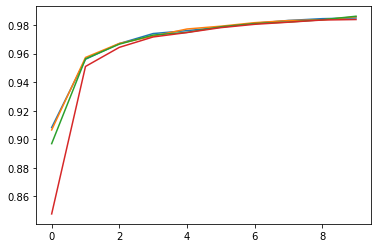

In [56]:
for training in results_4:
    print(f"Training results for {training[1]}: {training[2]} after {training[0]} seconds")
    plot = plt.plot(range(len(training[3].history['categorical_accuracy'])), training[3].history['categorical_accuracy'])
plt.show

### Model with 5 hidden layers [784, ?, ?, ?, ?, 10]

In [57]:
def create_5_layer_model(neurons):
    
    model = Sequential()
    model.add(Dense(units=784, input_dim=784, activation='relu'))
    model.add(Dense(units=neurons[0], activation='relu'))
    model.add(Dense(units=neurons[1], activation='relu'))
    model.add(Dense(units=neurons[2], activation='relu'))
    model.add(Dense(units=neurons[3], activation='relu'))
    model.add(Dense(units=neurons[4], activation='relu'))
    model.add(Dense(units=10, activation='softmax'))

    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=adam_optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['categorical_accuracy'])
    
    return model

In [58]:
# We will try to optimize the number of parameters on the model, by
# checking if the accuracy decreases if the number of neurons is reduced
neurons_comb = [
    [1024, 512, 256, 128, 64],
    [512, 256, 128, 64, 32],
    [256, 128, 64, 32, 16],
    [96, 64, 32, 24, 16]
]

In [59]:
results_5 = list()
for neurons in neurons_comb:
    
    start = time.time()

    model = create_5_layer_model(neurons)
    history = model.fit(x_train, y_train, batch_size=128, epochs=10)
    evaluation = model.evaluate(x_test, y_test, batch_size=128)

    training_time = time.time() - start
    print(f"Training time: {training_time} seconds. Neurons:  {neurons}")
    
    results_5.append((training_time, neurons, evaluation, history))


Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3151 - categorical_accuracy: 0.9000
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1434 - categorical_accuracy: 0.9560
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1101 - categorical_accuracy: 0.9672
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0914 - categorical_accuracy: 0.9728
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0768 - categorical_accuracy: 0.9767
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0724 - categorical_accuracy: 0.9782
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0614 - categorical_accuracy: 0.9811
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0550 - categorical_accuracy: 0.9832
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0496 - categorical_accuracy:

Training results for [1024, 512, 256, 128, 64]: [0.07622954994440079, 0.9775999784469604] after 39.35223388671875 seconds
Training results for [512, 256, 128, 64, 32]: [0.08621915429830551, 0.9750999808311462] after 23.67565941810608 seconds
Training results for [256, 128, 64, 32, 16]: [0.08988507091999054, 0.975600004196167] after 18.780624866485596 seconds
Training results for [96, 64, 32, 24, 16]: [0.10505400598049164, 0.9703999757766724] after 15.70632529258728 seconds


<function matplotlib.pyplot.show(close=None, block=None)>

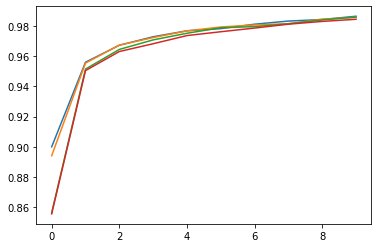

In [60]:
for training in results_5:
    print(f"Training results for {training[1]}: {training[2]} after {training[0]} seconds")
    plot = plt.plot(range(len(training[3].history['categorical_accuracy'])), training[3].history['categorical_accuracy'])
plt.show

### Model with 6 hidden layers [784, ?, ?, ?, ?, ?, ?, 10]

In [61]:
def create_6_layer_model(neurons):
    
    model = Sequential()
    model.add(Dense(units=784, input_dim=784, activation='relu'))
    model.add(Dense(units=neurons[0], activation='relu'))
    model.add(Dense(units=neurons[1], activation='relu'))
    model.add(Dense(units=neurons[2], activation='relu'))
    model.add(Dense(units=neurons[3], activation='relu'))
    model.add(Dense(units=neurons[4], activation='relu'))
    model.add(Dense(units=neurons[5], activation='relu'))
    model.add(Dense(units=10, activation='softmax'))

    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=adam_optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['categorical_accuracy'])
    
    return model

In [62]:
# We will try to optimize the number of parameters on the model, by
# checking if the accuracy decreases if the number of neurons is reduced
neurons_comb = [
    [1024, 512, 256, 128, 64, 32],
    [512, 256, 128, 64, 32, 16],
    [400, 200, 100, 50, 25, 15],
    [300, 150, 90, 45, 20, 12]
]

In [63]:
results_6 = list()
for neurons in neurons_comb:
    
    start = time.time()

    model = create_6_layer_model(neurons)
    history = model.fit(x_train, y_train, batch_size=128, epochs=10)
    evaluation = model.evaluate(x_test, y_test, batch_size=128)

    training_time = time.time() - start
    print(f"Training time: {training_time} seconds. Neurons:  {neurons}")
    
    results_6.append((training_time, neurons, evaluation, history))


Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.3876 - categorical_accuracy: 0.8754
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1506 - categorical_accuracy: 0.9546
Epoch 3/10
469/469 [==============================] - 4s 10ms/step - loss: 0.1116 - categorical_accuracy: 0.9661
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0924 - categorical_accuracy: 0.9716
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0805 - categorical_accuracy: 0.9754
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0684 - categorical_accuracy: 0.9791
Epoch 7/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0668 - categorical_accuracy: 0.9795
Epoch 8/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0595 - categorical_accuracy: 0.9822
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0500 - categorical_ac

Training results for [1024, 512, 256, 128, 64, 32]: [0.11262571066617966, 0.973800003528595] after 54.503724336624146 seconds
Training results for [512, 256, 128, 64, 32, 16]: [0.08744918555021286, 0.9757999777793884] after 23.89100170135498 seconds
Training results for [400, 200, 100, 50, 25, 15]: [0.10898907482624054, 0.9724000096321106] after 21.813250303268433 seconds
Training results for [300, 150, 90, 45, 20, 12]: [0.08072963356971741, 0.9772999882698059] after 19.681655883789062 seconds


<function matplotlib.pyplot.show(close=None, block=None)>

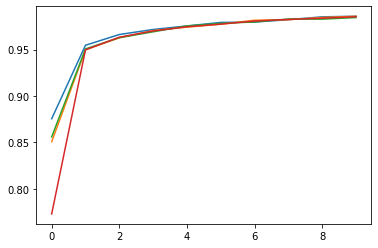

In [64]:
for training in results_6:
    print(f"Training results for {training[1]}: {training[2]} after {training[0]} seconds")
    plot = plt.plot(range(len(training[3].history['categorical_accuracy'])), training[3].history['categorical_accuracy'])
plt.show

# Task 4. Convolutional Neural Network

## Create CNN

In [5]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential

cnn_model = Sequential()

cnn_model.add(layers.Conv2D(32, (4, 4), strides=1, activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(layers.Conv2D(64, (4, 4), strides=2, activation='relu'))
cnn_model.add(layers.Conv2D(128, (4, 4), strides=2, activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(10, activation='softmax'))

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer=adam_optimizer, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])

In [41]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         131200    
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 185,066
Trainable params: 185,066
Non-trainable params: 0
_________________________________________________________________


In [6]:
cnn_history = cnn_model.fit(x_train, y_train, batch_size=100, epochs=5, verbose=1)

Epoch 1/5
600/600 [==============================] - 18s 29ms/step - loss: 0.1670 - sparse_categorical_accuracy: 0.9517
Epoch 2/5
600/600 [==============================] - 18s 29ms/step - loss: 0.0481 - sparse_categorical_accuracy: 0.9852
Epoch 3/5
600/600 [==============================] - 17s 29ms/step - loss: 0.0335 - sparse_categorical_accuracy: 0.9895
Epoch 4/5
600/600 [==============================] - 18s 29ms/step - loss: 0.0250 - sparse_categorical_accuracy: 0.9920
Epoch 5/5
600/600 [==============================] - 18s 29ms/step - loss: 0.0194 - sparse_categorical_accuracy: 0.9941


In [7]:
results = cnn_model.evaluate(x_test, y_test, batch_size=100)
print(f'Results: {results}')

100/100 [==============================] - 1s 8ms/step - loss: 0.0336 - sparse_categorical_accuracy: 0.9899
Results: [0.03363177180290222, 0.9898999929428101]


## Plot Training curve

<function matplotlib.pyplot.show(close=None, block=None)>

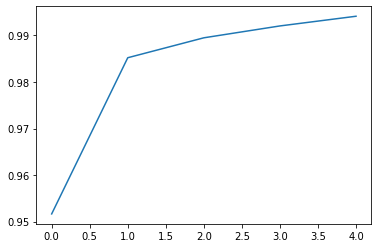

In [8]:
plot = plt.plot(range(len(cnn_history.history['sparse_categorical_accuracy'])), 
                cnn_history.history['sparse_categorical_accuracy'])
plt.show

## Plot Test curve

<function matplotlib.pyplot.show(close=None, block=None)>

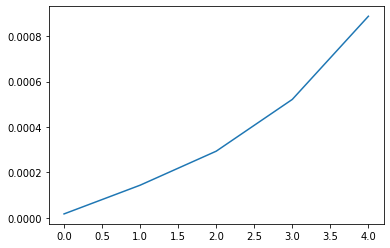

In [79]:
plot = plt.plot(range(len(trained_model.history['accuracy'])), trained_model.history['accuracy'])
plt.show

## Accuracy vs Depth vs Complexity

In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


### Model with 3 hidden layers

In [79]:
def create_3_layer_cnn_model(neurons):
    
    cnn_model = Sequential()

    cnn_model.add(layers.Conv2D(32, (4, 4), strides=1, activation='relu', input_shape=(28, 28, 1)))
    cnn_model.add(layers.Conv2D(neurons[0], (4, 4), strides=2, activation='relu'))
    cnn_model.add(layers.Conv2D(neurons[1], (4, 4), strides=2, activation='relu'))
    cnn_model.add(layers.Conv2D(neurons[2], (4, 4), strides=2, activation='relu'))
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(10, activation='softmax'))

    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    cnn_model.compile(optimizer=adam_optimizer, 
                      loss='sparse_categorical_crossentropy',
                      metrics=['sparse_categorical_accuracy'])
    
    return cnn_model

In [80]:
# We will try to optimize the number of parameters on the model, by
# checking if the accuracy decreases if the number of neurons is reduced
neurons_comb = [
    [64, 128, 64],
    [48, 100, 64],
    [48, 64, 48],
    [32, 32, 32]
]

In [81]:
cnn_3_results = list()
for neurons in neurons_comb:
    
    start = time.time()

    model = create_3_layer_cnn_model(neurons)
    history = model.fit(x_train, y_train, batch_size=128, epochs=10)
    evaluation = model.evaluate(x_test, y_test, batch_size=128)

    training_time = time.time() - start
    print(f"Training time: {training_time} seconds. Neurons:  {neurons}")
    
    cnn_3_results.append((training_time, neurons, evaluation, history))


Epoch 1/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1830 - sparse_categorical_accuracy: 0.9421
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0495 - sparse_categorical_accuracy: 0.9842
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0335 - sparse_categorical_accuracy: 0.9896
Epoch 4/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0258 - sparse_categorical_accuracy: 0.9916
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0200 - sparse_categorical_accuracy: 0.9936
Epoch 6/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0158 - sparse_categorical_accuracy: 0.9949
Epoch 7/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0126 - sparse_categorical_accuracy: 0.9958
Epoch 8/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0124 - sparse_categorical_accuracy: 0.9958
Epoch 9/10
469/469 [============

Training results for [64, 128, 64]: [0.04223410040140152, 0.9887999892234802] after 177.38258528709412 seconds
Training results for [48, 100, 64]: [0.03489360958337784, 0.9914000034332275] after 114.75113940238953 seconds
Training results for [48, 64, 48]: [0.03340364992618561, 0.9905999898910522] after 104.02235150337219 seconds
Training results for [32, 32, 32]: [0.0335603766143322, 0.9901999831199646] after 91.14062237739563 seconds


<function matplotlib.pyplot.show(close=None, block=None)>

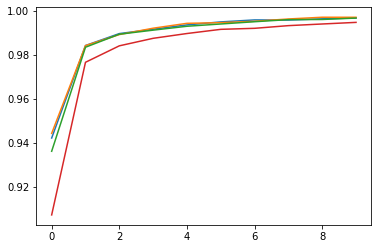

In [82]:
for training in cnn_3_results:
    print(f"Training results for {training[1]}: {training[2]} after {training[0]} seconds")
    plot = plt.plot(range(len(training[3].history['sparse_categorical_accuracy'])), training[3].history['sparse_categorical_accuracy'])
plt.show

### Model with 4 hidden layers

In [100]:
def create_4_layer_cnn_model(neurons):
    
    cnn_model = Sequential()

    cnn_model.add(layers.Conv2D(32, (4, 4), strides=1, activation='relu', input_shape=(28, 28, 1)))
    cnn_model.add(layers.Conv2D(neurons[0], (3, 3), activation='relu'))
    cnn_model.add(layers.Conv2D(neurons[1], (3, 3), activation='relu'))
    cnn_model.add(layers.Conv2D(neurons[2], (3, 3), activation='relu'))
    cnn_model.add(layers.Conv2D(neurons[3], (3, 3), activation='relu'))
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(10, activation='softmax'))

    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    cnn_model.compile(optimizer=adam_optimizer, 
                      loss='sparse_categorical_crossentropy',
                      metrics=['sparse_categorical_accuracy'])
    
    return cnn_model

In [101]:
# We will try to optimize the number of parameters on the model, by
# checking if the accuracy decreases if the number of neurons is reduced
neurons_comb = [
    [64, 128, 256, 128],
    [64, 128, 128, 64],
    [48, 64, 64, 48],
    [48, 50, 52, 48]
]

In [102]:
cnn_4_results = list()
for neurons in neurons_comb:
    
    start = time.time()

    model = create_4_layer_cnn_model(neurons)
    history = model.fit(x_train, y_train, batch_size=128, epochs=10)
    evaluation = model.evaluate(x_test, y_test, batch_size=128)

    training_time = time.time() - start
    print(f"Training time: {training_time} seconds. Neurons:  {neurons}")
    
    cnn_4_results.append((training_time, neurons, evaluation, history))


Epoch 1/10
469/469 [==============================] - 263s 560ms/step - loss: 0.1347 - sparse_categorical_accuracy: 0.9587
Epoch 2/10
469/469 [==============================] - 265s 565ms/step - loss: 0.0427 - sparse_categorical_accuracy: 0.9868
Epoch 3/10
469/469 [==============================] - 256s 546ms/step - loss: 0.0303 - sparse_categorical_accuracy: 0.9904
Epoch 4/10
469/469 [==============================] - 253s 538ms/step - loss: 0.0225 - sparse_categorical_accuracy: 0.9928
Epoch 5/10
469/469 [==============================] - 252s 537ms/step - loss: 0.0185 - sparse_categorical_accuracy: 0.9940
Epoch 6/10
469/469 [==============================] - 252s 537ms/step - loss: 0.0143 - sparse_categorical_accuracy: 0.9953
Epoch 7/10
469/469 [==============================] - 251s 536ms/step - loss: 0.0120 - sparse_categorical_accuracy: 0.9961
Epoch 8/10
469/469 [==============================] - 251s 535ms/step - loss: 0.0123 - sparse_categorical_accuracy: 0.9959
Epoch 9/10
469/4

Training results for [64, 128, 256, 128]: [0.038411546498537064, 0.9908000230789185] after 2554.1249969005585 seconds
Training results for [64, 128, 128, 64]: [0.045211341232061386, 0.9882000088691711] after 1342.3884370326996 seconds
Training results for [48, 64, 64, 48]: [0.04512206092476845, 0.9883000254631042] after 685.6570217609406 seconds
Training results for [48, 50, 52, 48]: [0.03350803256034851, 0.9894999861717224] after 653.6327917575836 seconds


<function matplotlib.pyplot.show(close=None, block=None)>

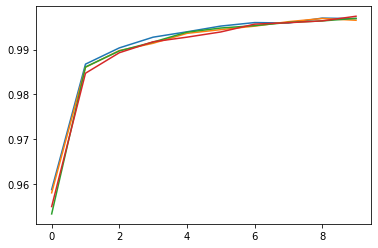

In [104]:
for training in cnn_4_results:
    print(f"Training results for {training[1]}: {training[2]} after {training[0]} seconds")
    plot = plt.plot(range(len(training[3].history['sparse_categorical_accuracy'])), training[3].history['sparse_categorical_accuracy'])
plt.show

### Model with 5 hidden layers

In [105]:
def create_5_layer_cnn_model(neurons):
    
    cnn_model = Sequential()

    cnn_model.add(layers.Conv2D(32, (4, 4), strides=1, activation='relu', input_shape=(28, 28, 1)))
    cnn_model.add(layers.Conv2D(neurons[0], (2, 2), activation='relu'))
    cnn_model.add(layers.Conv2D(neurons[1], (2, 2), activation='relu'))
    cnn_model.add(layers.Conv2D(neurons[2], (2, 2), activation='relu'))
    cnn_model.add(layers.Conv2D(neurons[3], (2, 2), activation='relu'))
    cnn_model.add(layers.Conv2D(neurons[4], (2, 2), activation='relu'))
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(10, activation='softmax'))

    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    cnn_model.compile(optimizer=adam_optimizer, 
                      loss='sparse_categorical_crossentropy',
                      metrics=['sparse_categorical_accuracy'])
    
    return model

In [106]:
# We will try to optimize the number of parameters on the model, by
# checking if the accuracy decreases if the number of neurons is reduced
neurons_comb = [
    [64, 128, 256, 128,  64],
    [64, 128, 128, 128, 64],
    [48, 64, 128, 64, 48],
    [32, 32, 32, 32, 32]
]

In [107]:
cnn_5_results = list()
for neurons in neurons_comb:
    
    start = time.time()

    model = create_5_layer_cnn_model(neurons)
    history = model.fit(x_train, y_train, batch_size=128, epochs=10)
    evaluation = model.evaluate(x_test, y_test, batch_size=128)

    training_time = time.time() - start
    print(f"Training time: {training_time} seconds. Neurons:  {neurons}")
    
    cnn_5_results.append((training_time, neurons, evaluation, history))


Epoch 1/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0084 - sparse_categorical_accuracy: 0.9972
Epoch 2/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0078 - sparse_categorical_accuracy: 0.9974
Epoch 3/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0072 - sparse_categorical_accuracy: 0.9976
Epoch 4/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0060 - sparse_categorical_accuracy: 0.9982
Epoch 5/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0061 - sparse_categorical_accuracy: 0.9979
Epoch 6/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0045 - sparse_categorical_accuracy: 0.9985
Epoch 7/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0046 - sparse_categorical_accuracy: 0.9984
Epoch 8/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0049 - sparse_categorical_accuracy: 0.9984
Epoch 9/10
469/469 [====

Training results for [64, 128, 256, 128, 64]: [0.053010374307632446, 0.9908000230789185] after 644.4770133495331 seconds
Training results for [64, 128, 128, 128, 64]: [0.05753689631819725, 0.9891999959945679] after 665.2160339355469 seconds
Training results for [48, 64, 128, 64, 48]: [0.07819605618715286, 0.9904999732971191] after 684.9769034385681 seconds
Training results for [32, 32, 32, 32, 32]: [0.09013886004686356, 0.9898999929428101] after 682.1368088722229 seconds


<function matplotlib.pyplot.show(close=None, block=None)>

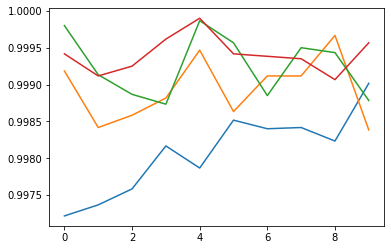

In [110]:
for training in cnn_5_results:
    print(f"Training results for {training[1]}: {training[2]} after {training[0]} seconds")
    plot = plt.plot(range(len(training[3].history['sparse_categorical_accuracy'])), training[3].history['sparse_categorical_accuracy'])
plt.show

### Model with a single hidden layer

In [111]:
def create_single_layer_cnn_model(neurons):
    
    cnn_model = Sequential()

    cnn_model.add(layers.Conv2D(32, (4, 4), strides=1, activation='relu', input_shape=(28, 28, 1)))
    cnn_model.add(layers.Conv2D(neurons[0], (4,4), strides=2, activation='relu'))
    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(10, activation='softmax'))

    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    cnn_model.compile(optimizer=adam_optimizer, 
                      loss='sparse_categorical_crossentropy',
                      metrics=['sparse_categorical_accuracy'])
    
    return model

In [112]:
# We will try to optimize the number of parameters on the model, by
# checking if the accuracy decreases if the number of neurons is reduced
neurons_comb = [
    [8], [16], [32], [64], [128], [256], [512]
]

In [114]:
cnn_1_results = list()
for neurons in neurons_comb:
    
    start = time.time()

    model = create_single_layer_cnn_model(neurons)
    history = model.fit(x_train, y_train, batch_size=128, epochs=10)
    evaluation = model.evaluate(x_test, y_test, batch_size=128)

    training_time = time.time() - start
    print(f"Training time: {training_time} seconds. Neurons:  {neurons}")
    
    cnn_1_results.append((training_time, neurons, evaluation, history))


Epoch 1/10
469/469 [==============================] - 65s 140ms/step - loss: 3.3967e-04 - sparse_categorical_accuracy: 0.9999
Epoch 2/10
469/469 [==============================] - 66s 141ms/step - loss: 5.9165e-05 - sparse_categorical_accuracy: 1.0000
Epoch 3/10
469/469 [==============================] - 66s 140ms/step - loss: 1.9188e-05 - sparse_categorical_accuracy: 1.0000
Epoch 4/10
469/469 [==============================] - 66s 140ms/step - loss: 2.0173e-06 - sparse_categorical_accuracy: 1.0000
Epoch 5/10
469/469 [==============================] - 65s 139ms/step - loss: 5.2805e-07 - sparse_categorical_accuracy: 1.0000
Epoch 6/10
469/469 [==============================] - 66s 140ms/step - loss: 4.2159e-07 - sparse_categorical_accuracy: 1.0000
Epoch 7/10
469/469 [==============================] - 65s 138ms/step - loss: 3.4601e-07 - sparse_categorical_accuracy: 1.0000
Epoch 8/10
469/469 [==============================] - 65s 138ms/step - loss: 2.8600e-07 - sparse_categorical_accuracy:

469/469 [==============================] - 69s 148ms/step - loss: 6.3578e-11 - sparse_categorical_accuracy: 1.0000
Epoch 10/10
79/79 [==============================] - 2s 24ms/step - loss: 0.1047 - sparse_categorical_accuracy: 0.9915
Training time: 674.9958131313324 seconds. Neurons:  [256]
Epoch 1/10
469/469 [==============================] - 69s 146ms/step - loss: 5.5631e-11 - sparse_categorical_accuracy: 1.0000
Epoch 2/10
469/469 [==============================] - 67s 144ms/step - loss: 4.9671e-11 - sparse_categorical_accuracy: 1.0000
Epoch 3/10
469/469 [==============================] - 69s 146ms/step - loss: 5.3644e-11 - sparse_categorical_accuracy: 1.0000
Epoch 4/10
469/469 [==============================] - 69s 146ms/step - loss: 5.3644e-11 - sparse_categorical_accuracy: 1.0000
Epoch 5/10
469/469 [==============================] - 67s 142ms/step - loss: 5.5631e-11 - sparse_categorical_accuracy: 1.0000
Epoch 6/10
469/469 [==============================] - 68s 145ms/step - loss: 5

Training results for [8]: [0.08883453160524368, 0.9908000230789185] after 654.4829697608948 seconds
Training results for [16]: [0.09243705868721008, 0.991100013256073] after 654.270055770874 seconds
Training results for [32]: [0.09822144359350204, 0.991100013256073] after 652.2041349411011 seconds
Training results for [64]: [0.10475794970989227, 0.9912999868392944] after 649.7466850280762 seconds
Training results for [128]: [0.1062065064907074, 0.9915000200271606] after 649.9928457736969 seconds
Training results for [256]: [0.10471715033054352, 0.9915000200271606] after 674.9958131313324 seconds
Training results for [512]: [0.1030270978808403, 0.9916999936103821] after 700.117568731308 seconds


<function matplotlib.pyplot.show(close=None, block=None)>

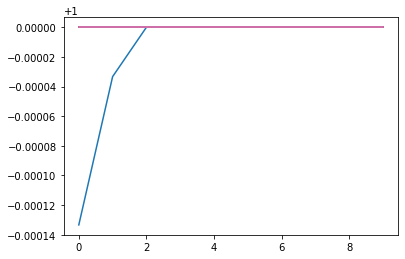

In [115]:
for training in cnn_1_results:
    print(f"Training results for {training[1]}: {training[2]} after {training[0]} seconds")
    plot = plt.plot(range(len(training[3].history['sparse_categorical_accuracy'])), training[3].history['sparse_categorical_accuracy'])
plt.show

# Task 5. Visualizing CNN outcomes

conv2d (4, 4, 1, 32)
Filters shape after normalization:  (4, 4, 1, 32)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)
(4, 4, 1)


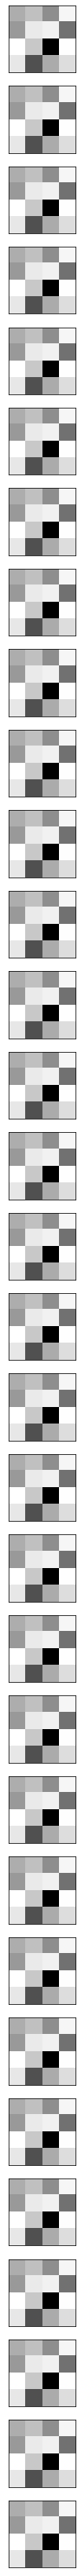

conv2d_1 (4, 4, 32, 64)
Filters shape after normalization:  (4, 4, 32, 64)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)
(4, 4, 32)


ValueError: num must be 1 <= num <= 32, not 1025

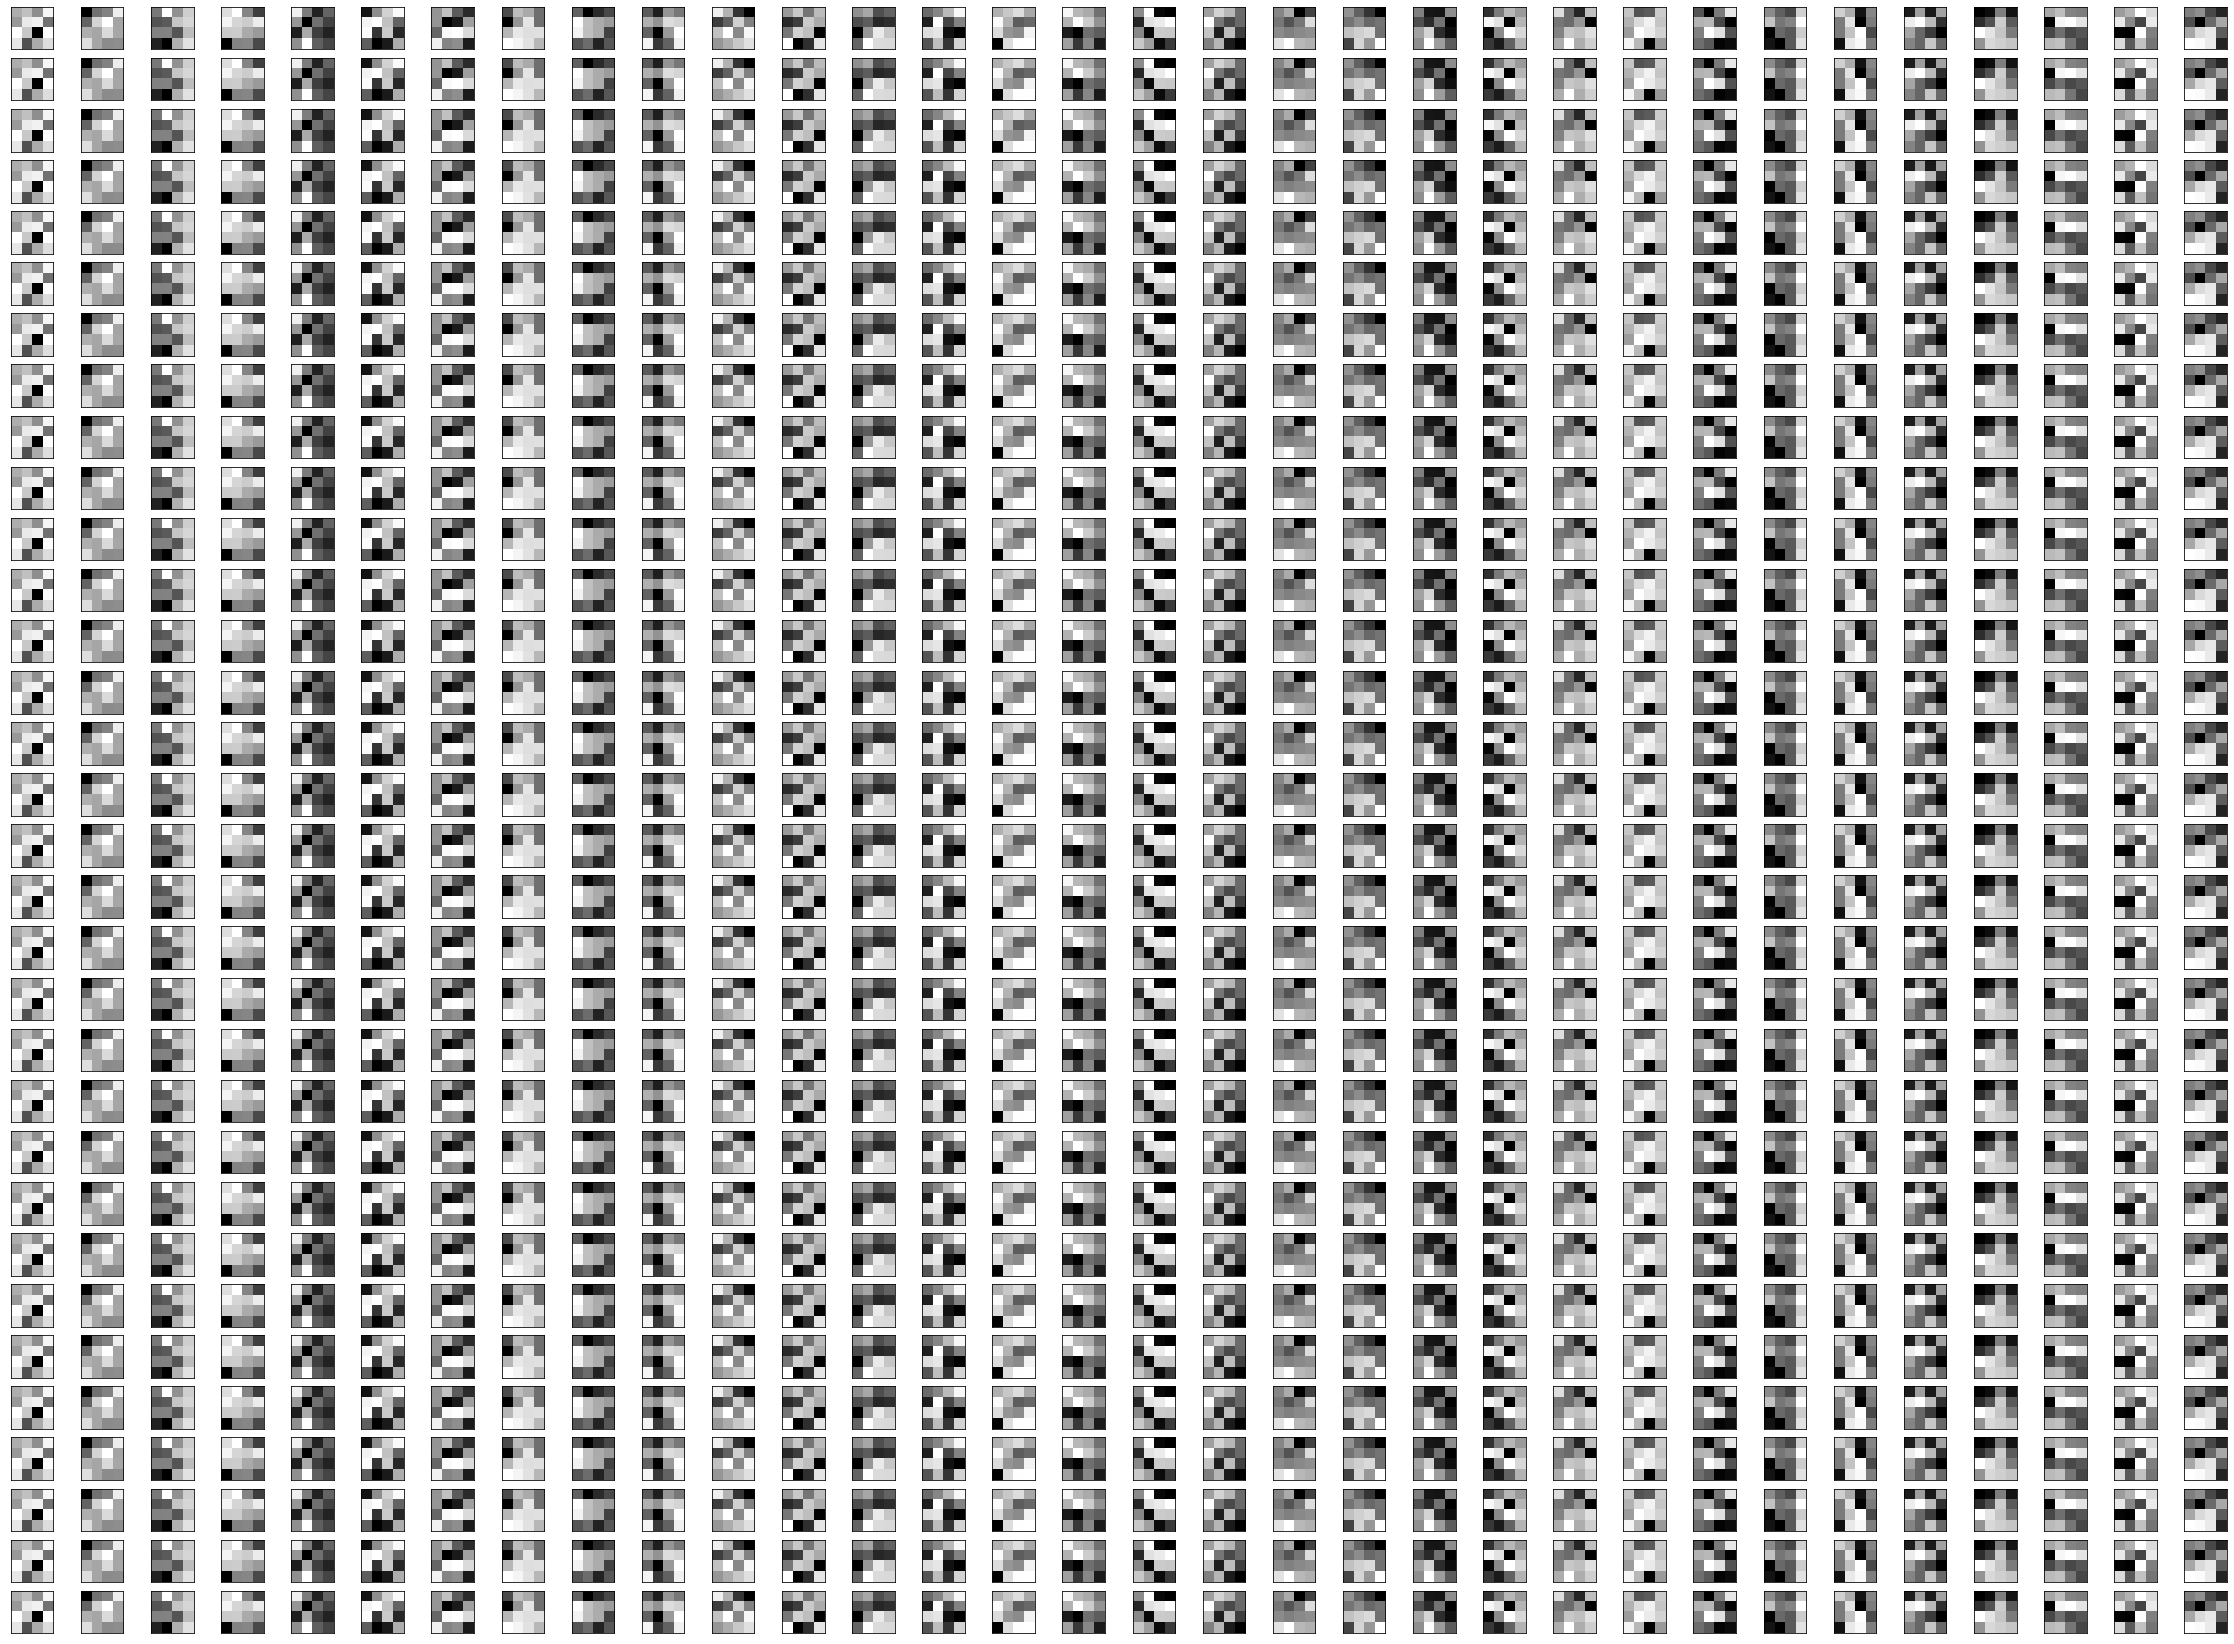

In [18]:
#Iterate thru all the layers of the model
for layer in cnn_model.layers:
    plt.figure(figsize=(40, 60))
    if 'conv' in layer.name:
        filters, biases = layer.get_weights()
        print(layer.name, filters.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)  
        print('Filters shape after normalization: ', filters.shape)
        filter_count = 1
        
        #plotting all the filters
        for filter_num in range(filters.shape[3]):
                        
            #get the filter
            filter_ = filters[:,:,:,filter_num]
            print(filter_.shape)
            #plotting each of the channel, color image RGB channels
            for channel in range(filters.shape[2]):
                
                if filter_num == 32:
                    ax= plt.subplot(8, 4, filter_count)
                    ax.set_xticks([])
                    ax.set_yticks([])
                    plt.imshow(filter[:,:,channel], cmap='Greys')
                    filter_count += 1
                    continue
                
                ax= plt.subplot(filters.shape[3], filters.shape[2], filter_count)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filter[:,:,channel], cmap='Greys')
                filter_count += 1
    plt.show()
    

### Pick random images for 2 and 9 classes

In [52]:
import random
two_samples = list()
nine_samples = list()
for sample, label in zip(x_train, y_train):
    if label == 2:
        two_samples.append(sample)
    if label == 9:
        nine_samples.append(sample)
        
two_sample = random.choice(two_samples)
two_sample = two_sample.reshape((1, 28, 28, 1))

nine_sample = random.choice(nine_samples)
nine_sample = nine_sample.reshape((1, 28, 28, 1))

(1, 28, 28, 1)


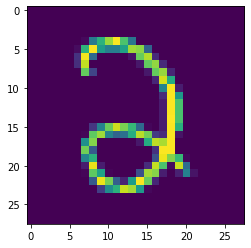

In [54]:
print(two_sample.shape)
plt.imshow(two_sample[0])

(1, 28, 28, 1)


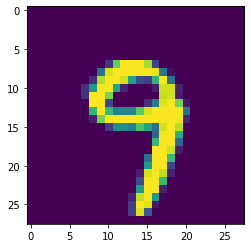

In [55]:
print(nine_sample.shape)
plt.imshow(nine_sample[0])

## Plot activation of the 2 image

### FIRST LAYER (output = 1x25x25x32)

In [58]:
# redefine model to output right after the first hidden layer
first_cnn_layer_model = keras.Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[0].output)

In [59]:
feature_maps = first_cnn_layer_model.predict(two_sample)

1/1 [==============================] - 0s 22ms/step


In [60]:
feature_maps.shape

(1, 25, 25, 32)

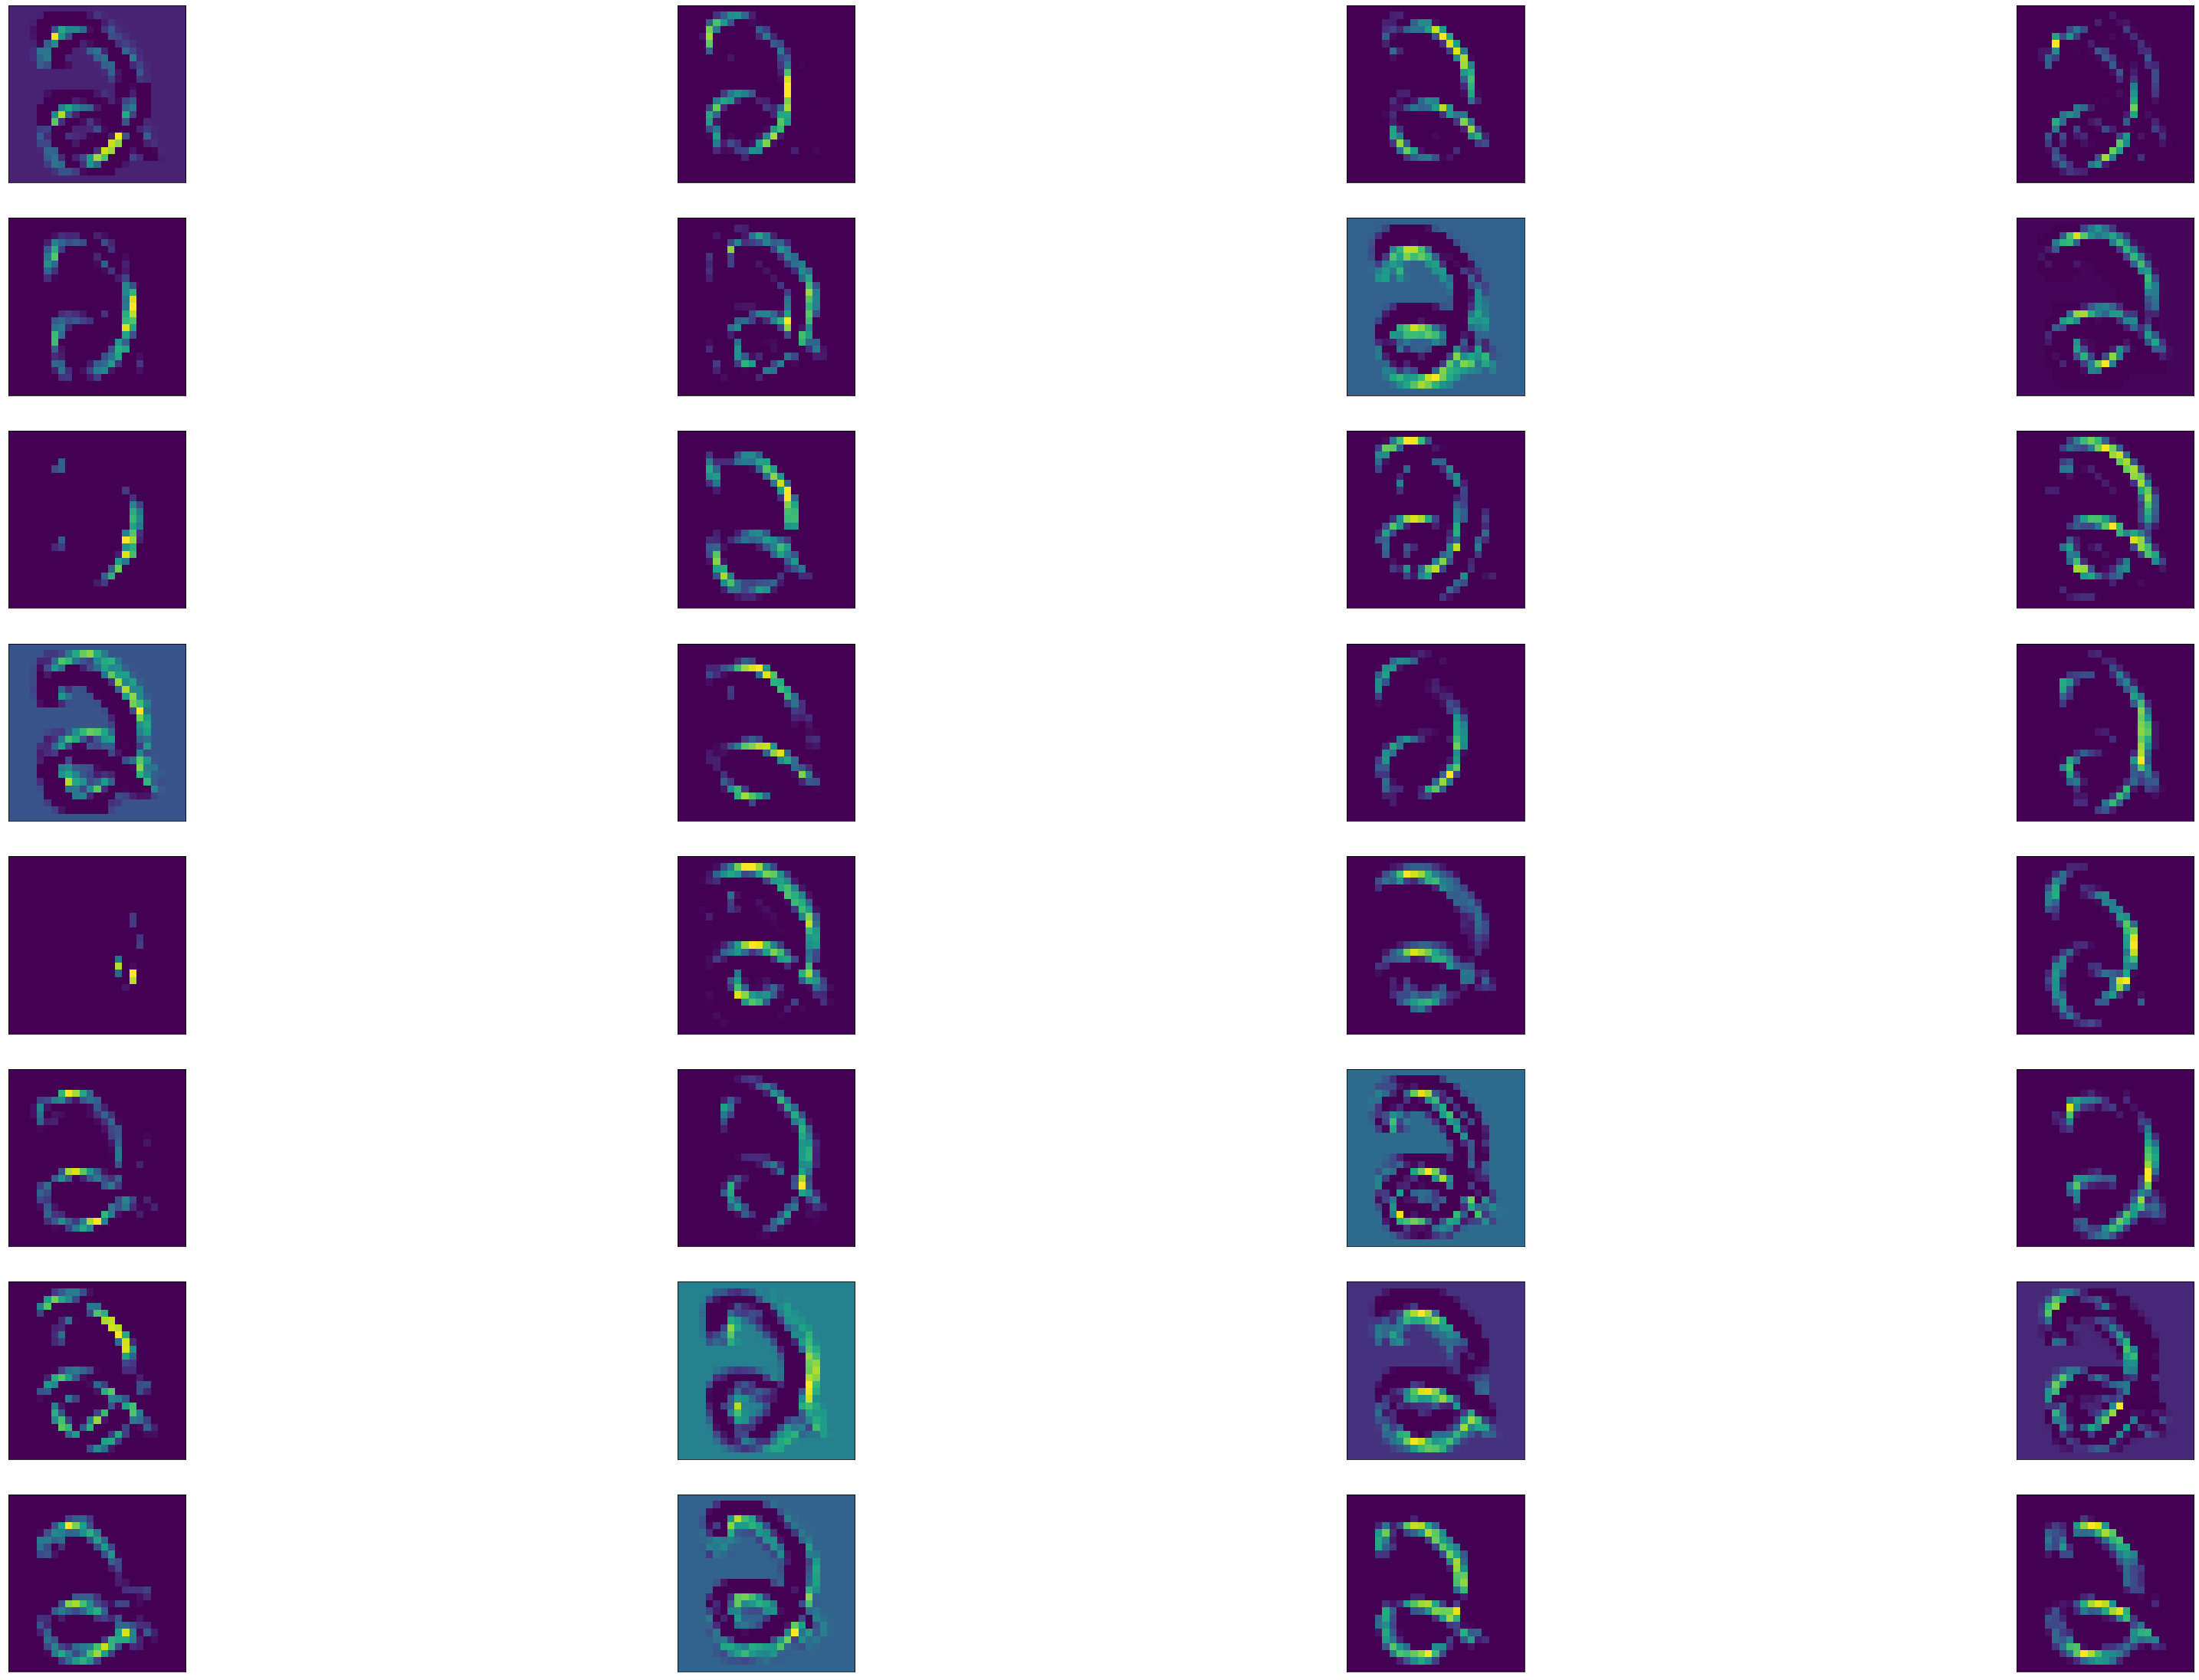

In [67]:
# plot all 32 maps in an 8x4 squares
ind = 1
plt.figure(figsize=(60, 40))
for _ in range(8):
    for _ in range(4):
        # specify subplot and turn of axis
        ax = plt.subplot(8, 4, ind)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ind-1])
        ind += 1
# show the figure
plt.show()

### SECOND LAYER (output = 1x11x11x64)

In [80]:
# redefine model to output right after the first hidden layer
second_cnn_layer_model = keras.Model(inputs=cnn_model.layers[0].output, outputs=cnn_model.layers[1].output)

In [82]:
feature_maps = second_cnn_layer_model.predict(feature_maps)

1/1 [==============================] - 0s 21ms/step


In [83]:
feature_maps.shape

(1, 11, 11, 64)

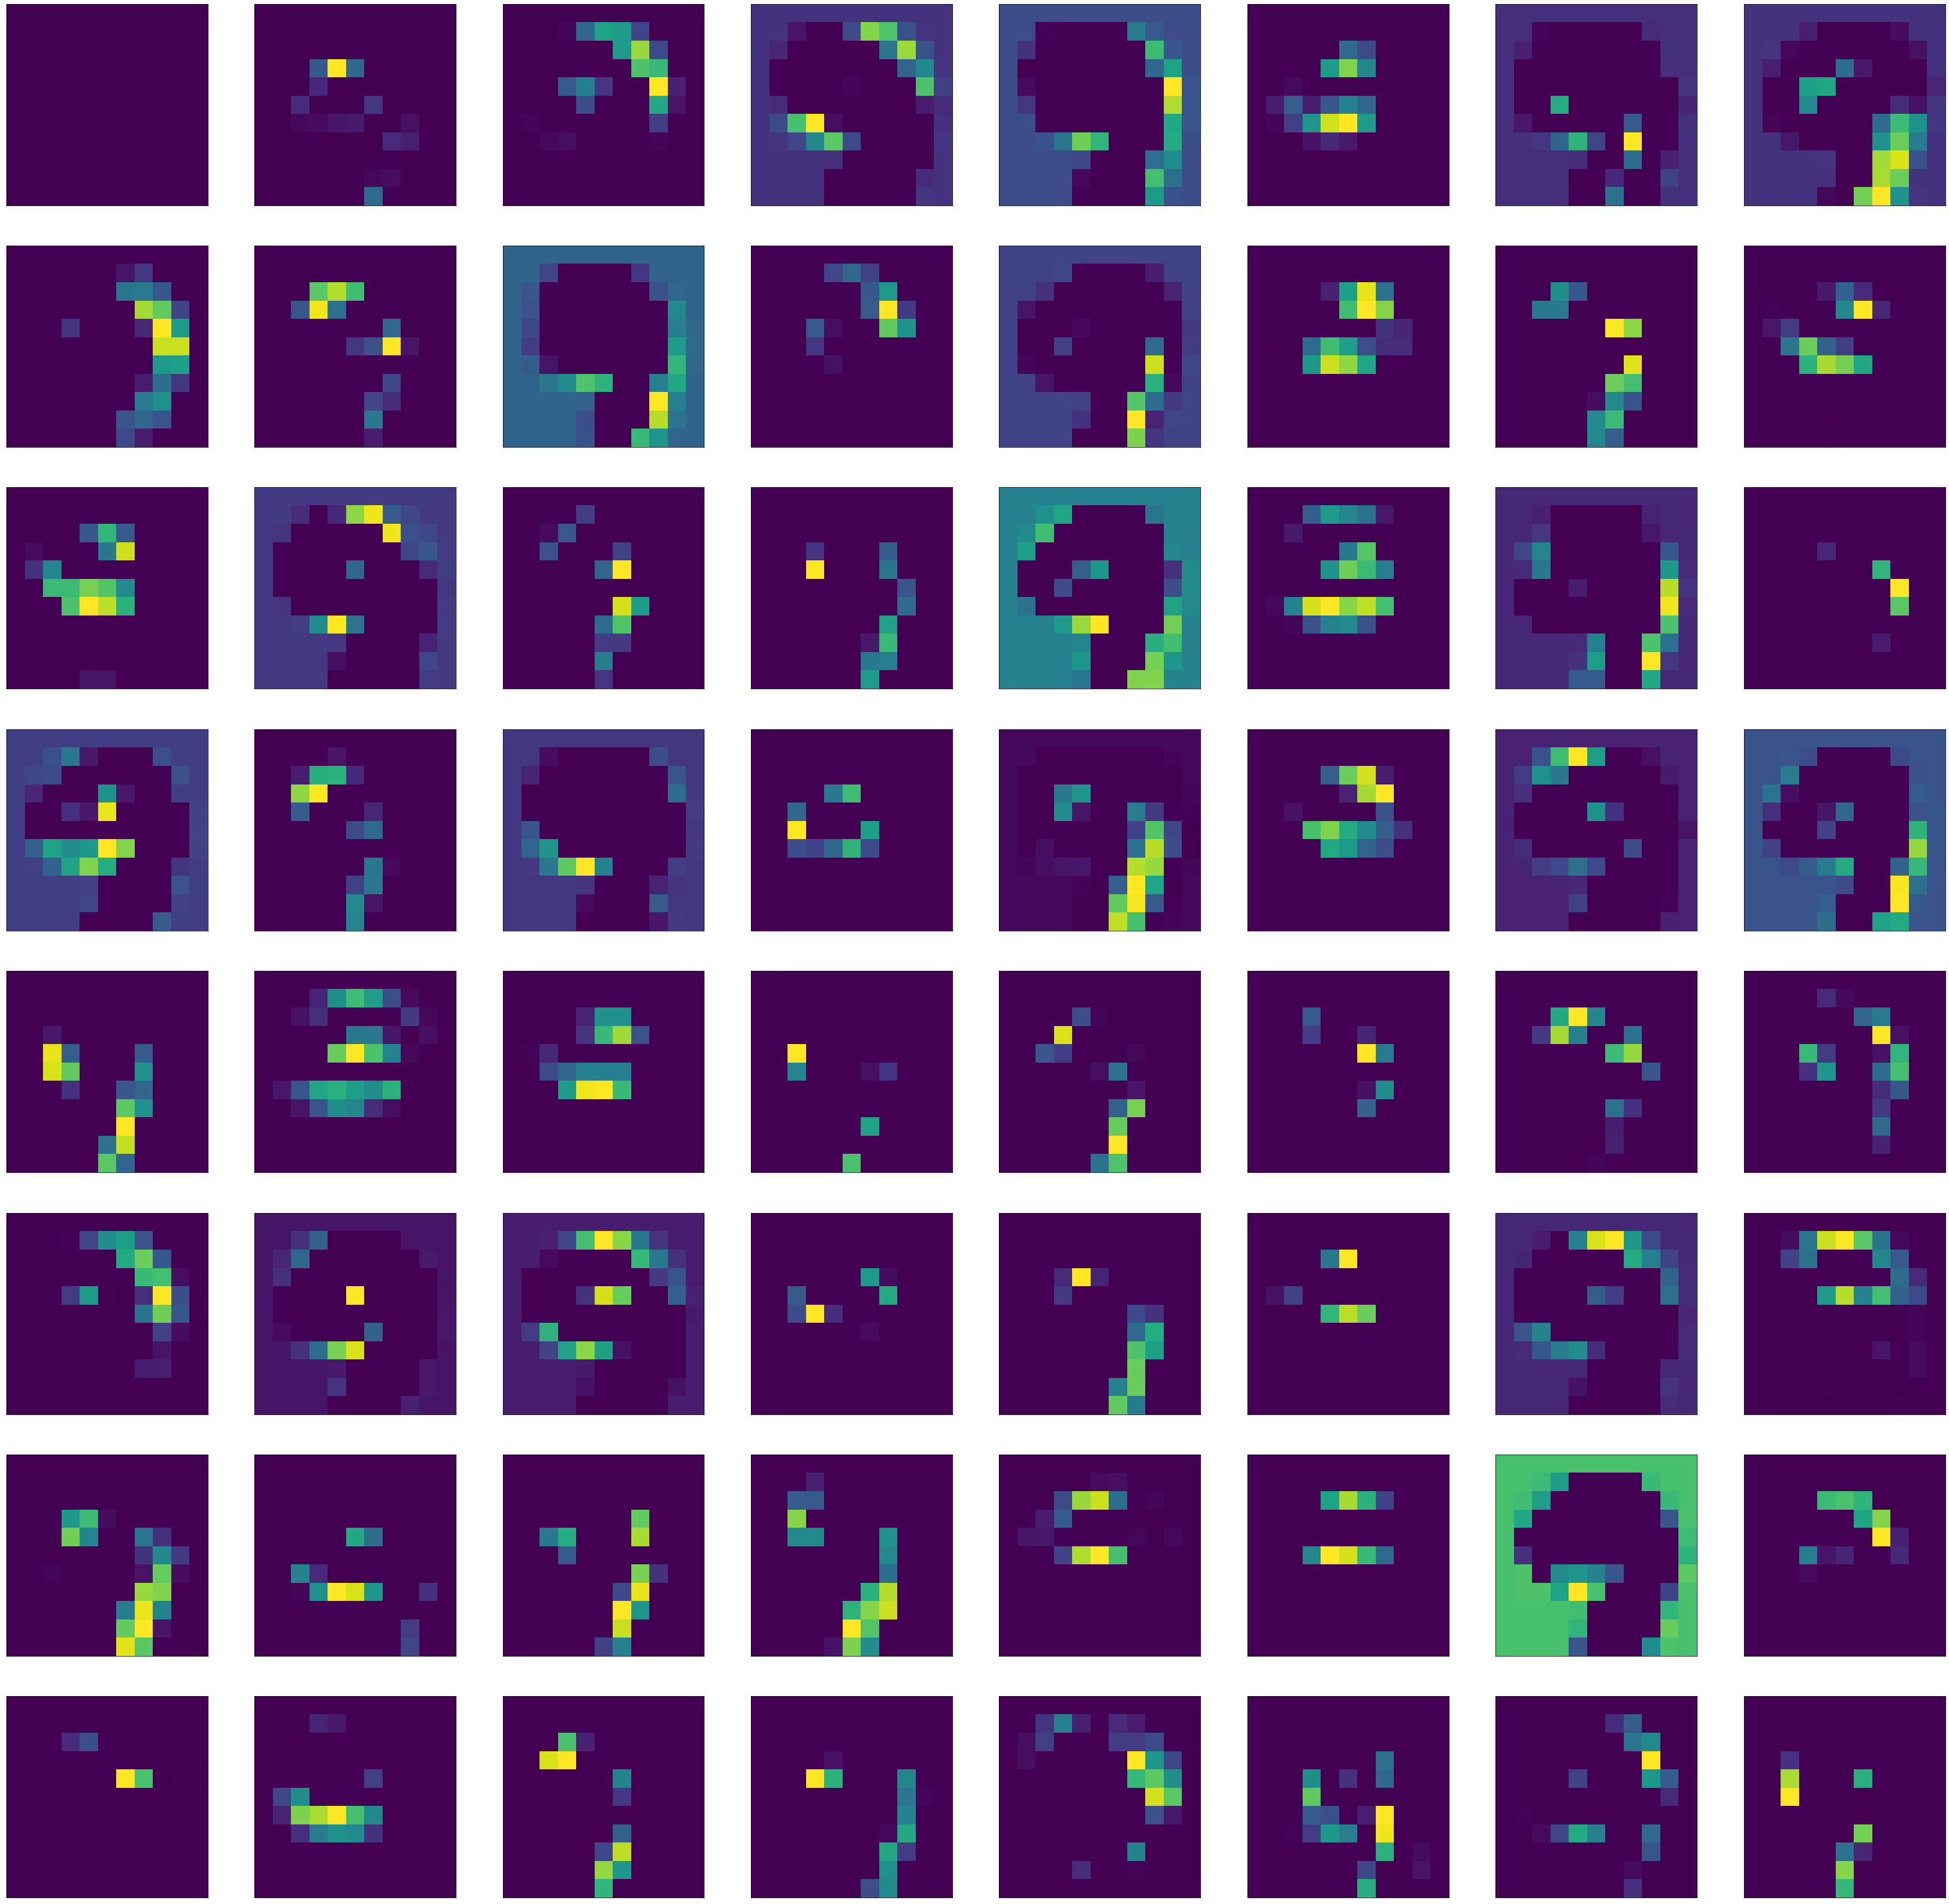

In [84]:
# plot all 32 maps in an 8x4 squares
ind = 1
plt.figure(figsize=(60, 60))
for _ in range(8):
    for _ in range(8):
        # specify subplot and turn of axis
        ax = plt.subplot(8, 8, ind)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ind-1])
        ind += 1
# show the figure
plt.show()

### THIRD LAYER (output = 1x4x4x128)

In [85]:
# redefine model to output right after the first hidden layer
third_cnn_layer_model = keras.Model(inputs=cnn_model.layers[1].output, outputs=cnn_model.layers[2].output)

In [86]:
feature_maps = third_cnn_layer_model.predict(feature_maps)

1/1 [==============================] - 0s 25ms/step


In [87]:
feature_maps.shape

(1, 4, 4, 128)

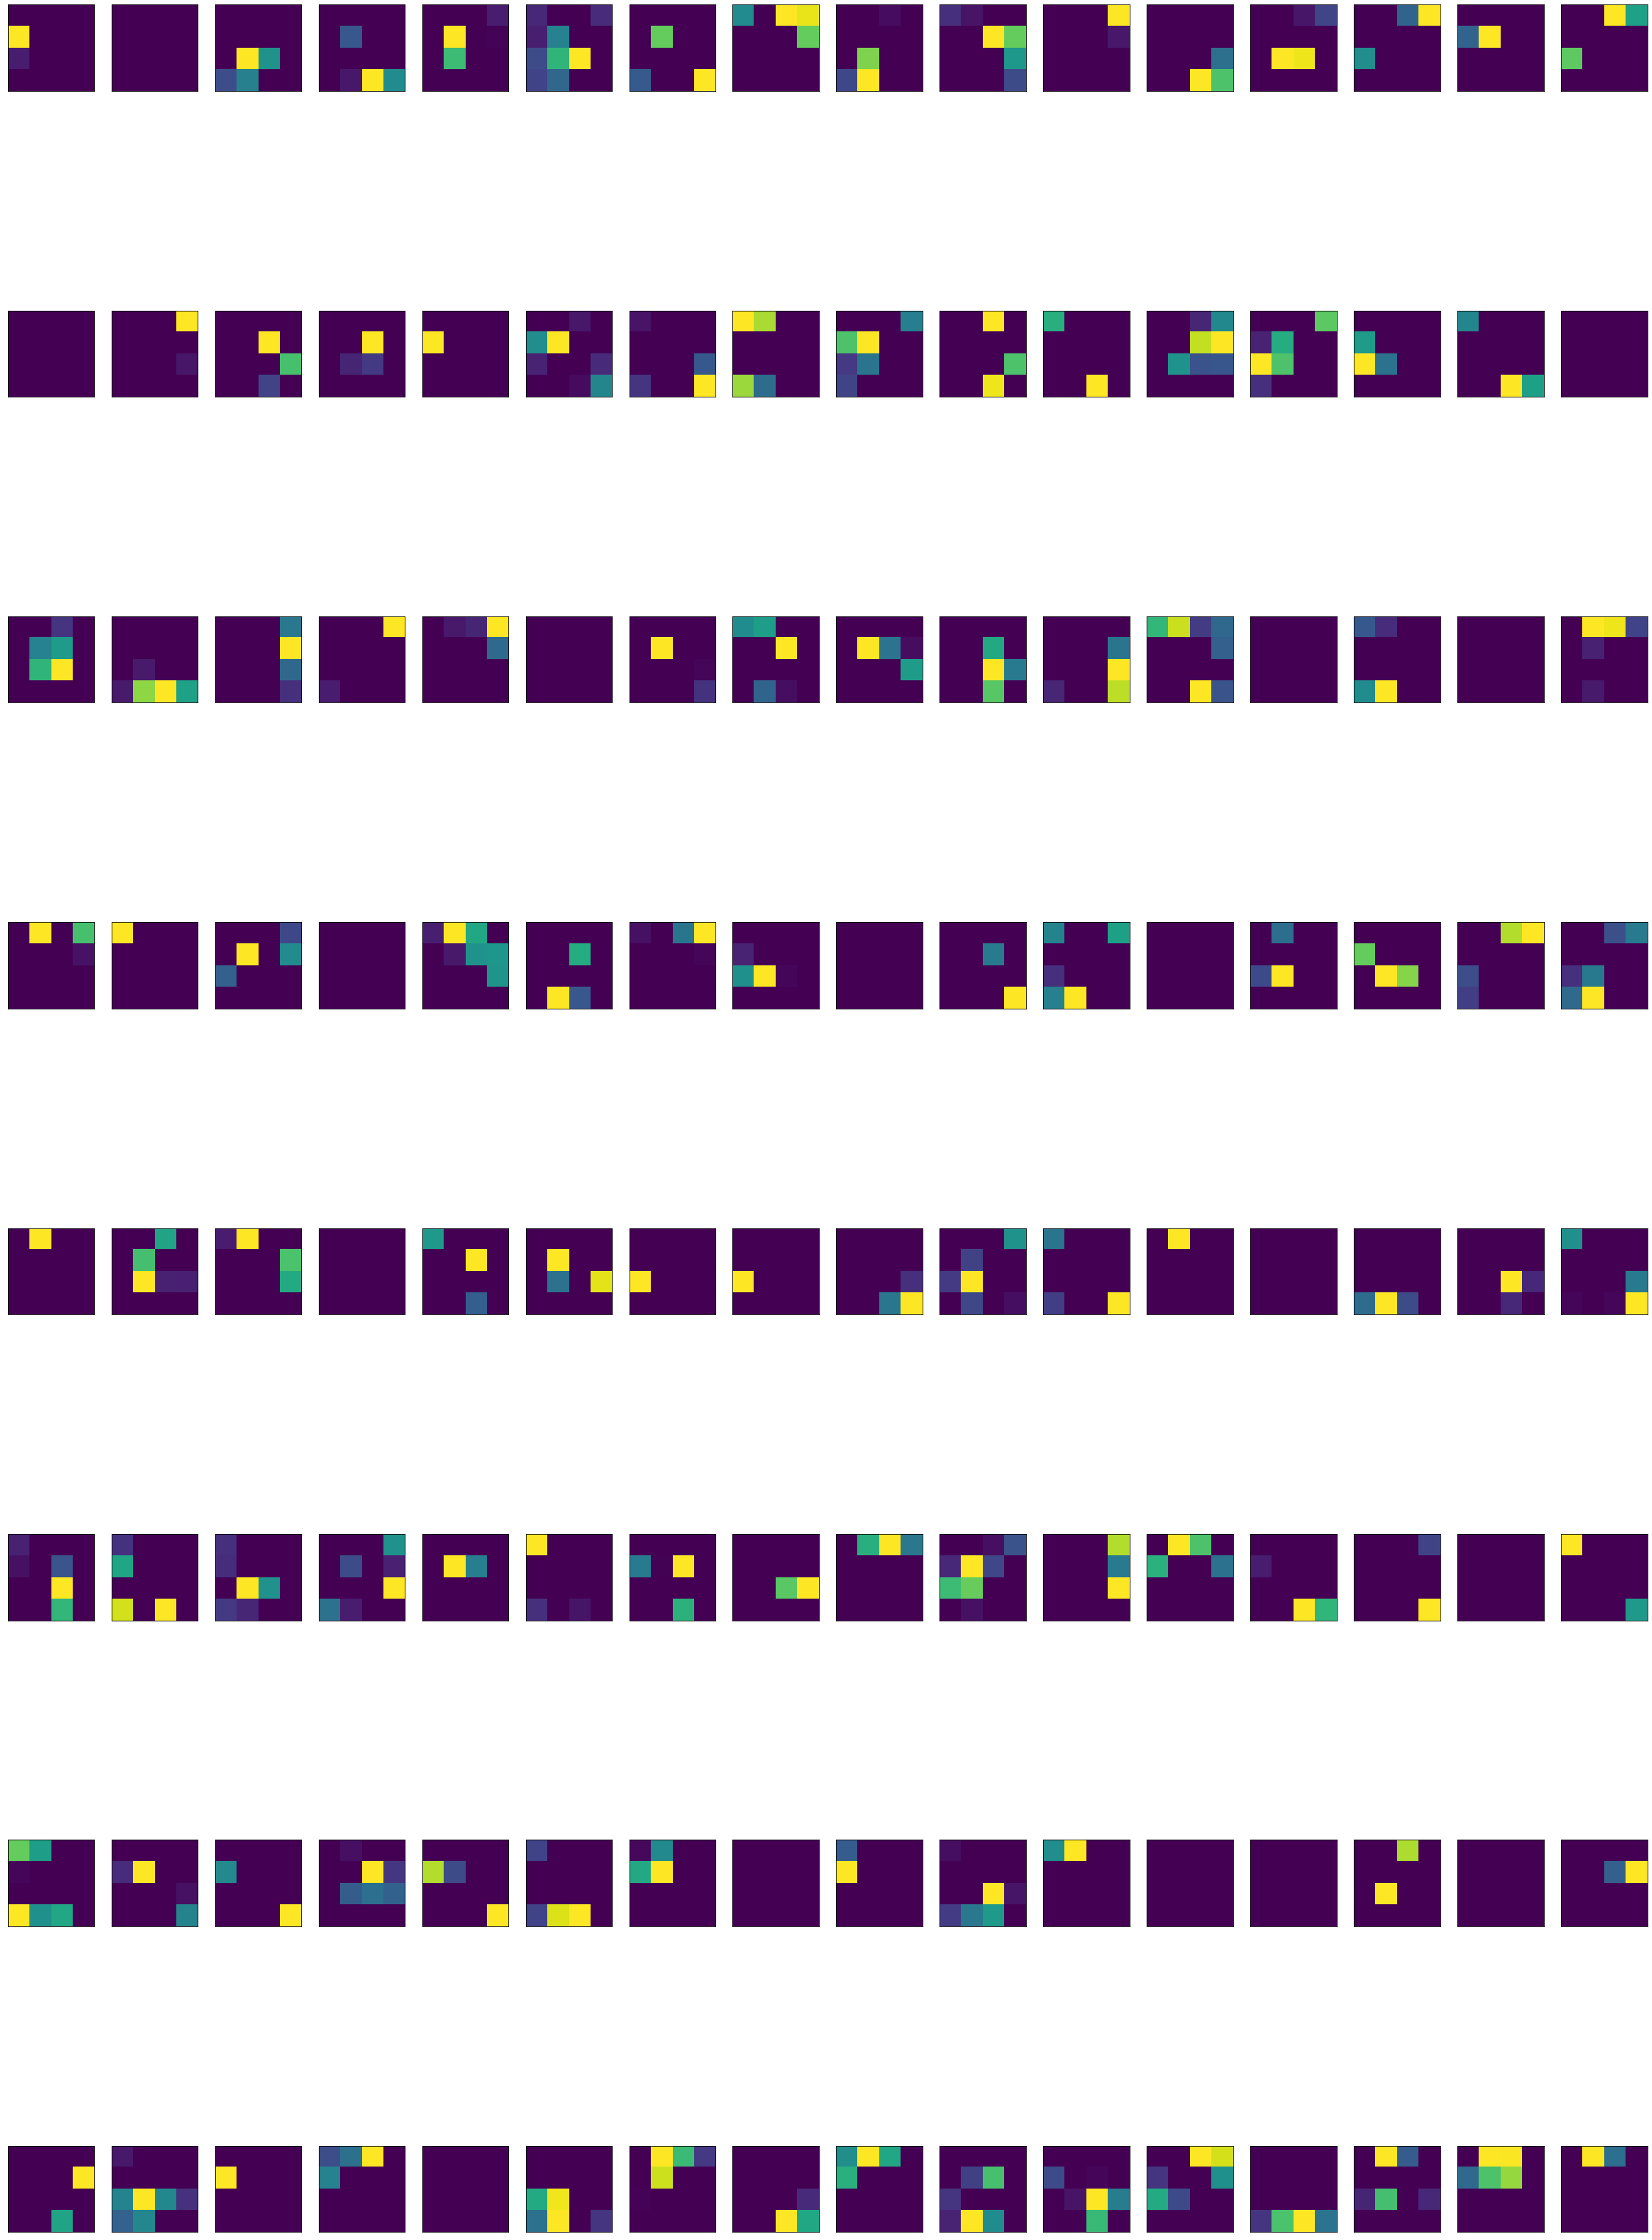

In [88]:
# plot all 32 maps in an 8x4 squares
ind = 1
plt.figure(figsize=(40, 60))
for _ in range(8):
    for _ in range(16):
        # specify subplot and turn of axis
        ax = plt.subplot(8, 16, ind)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ind-1])
        ind += 1
# show the figure
plt.show()

## Plot activation of the 9 image

### FIRST LAYER (output = 1x25x25x32)

In [89]:
# redefine model to output right after the first hidden layer
first_cnn_layer_model = keras.Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[0].output)

In [90]:
feature_maps = first_cnn_layer_model.predict(nine_sample)

1/1 [==============================] - 0s 24ms/step


In [91]:
feature_maps.shape

(1, 25, 25, 32)

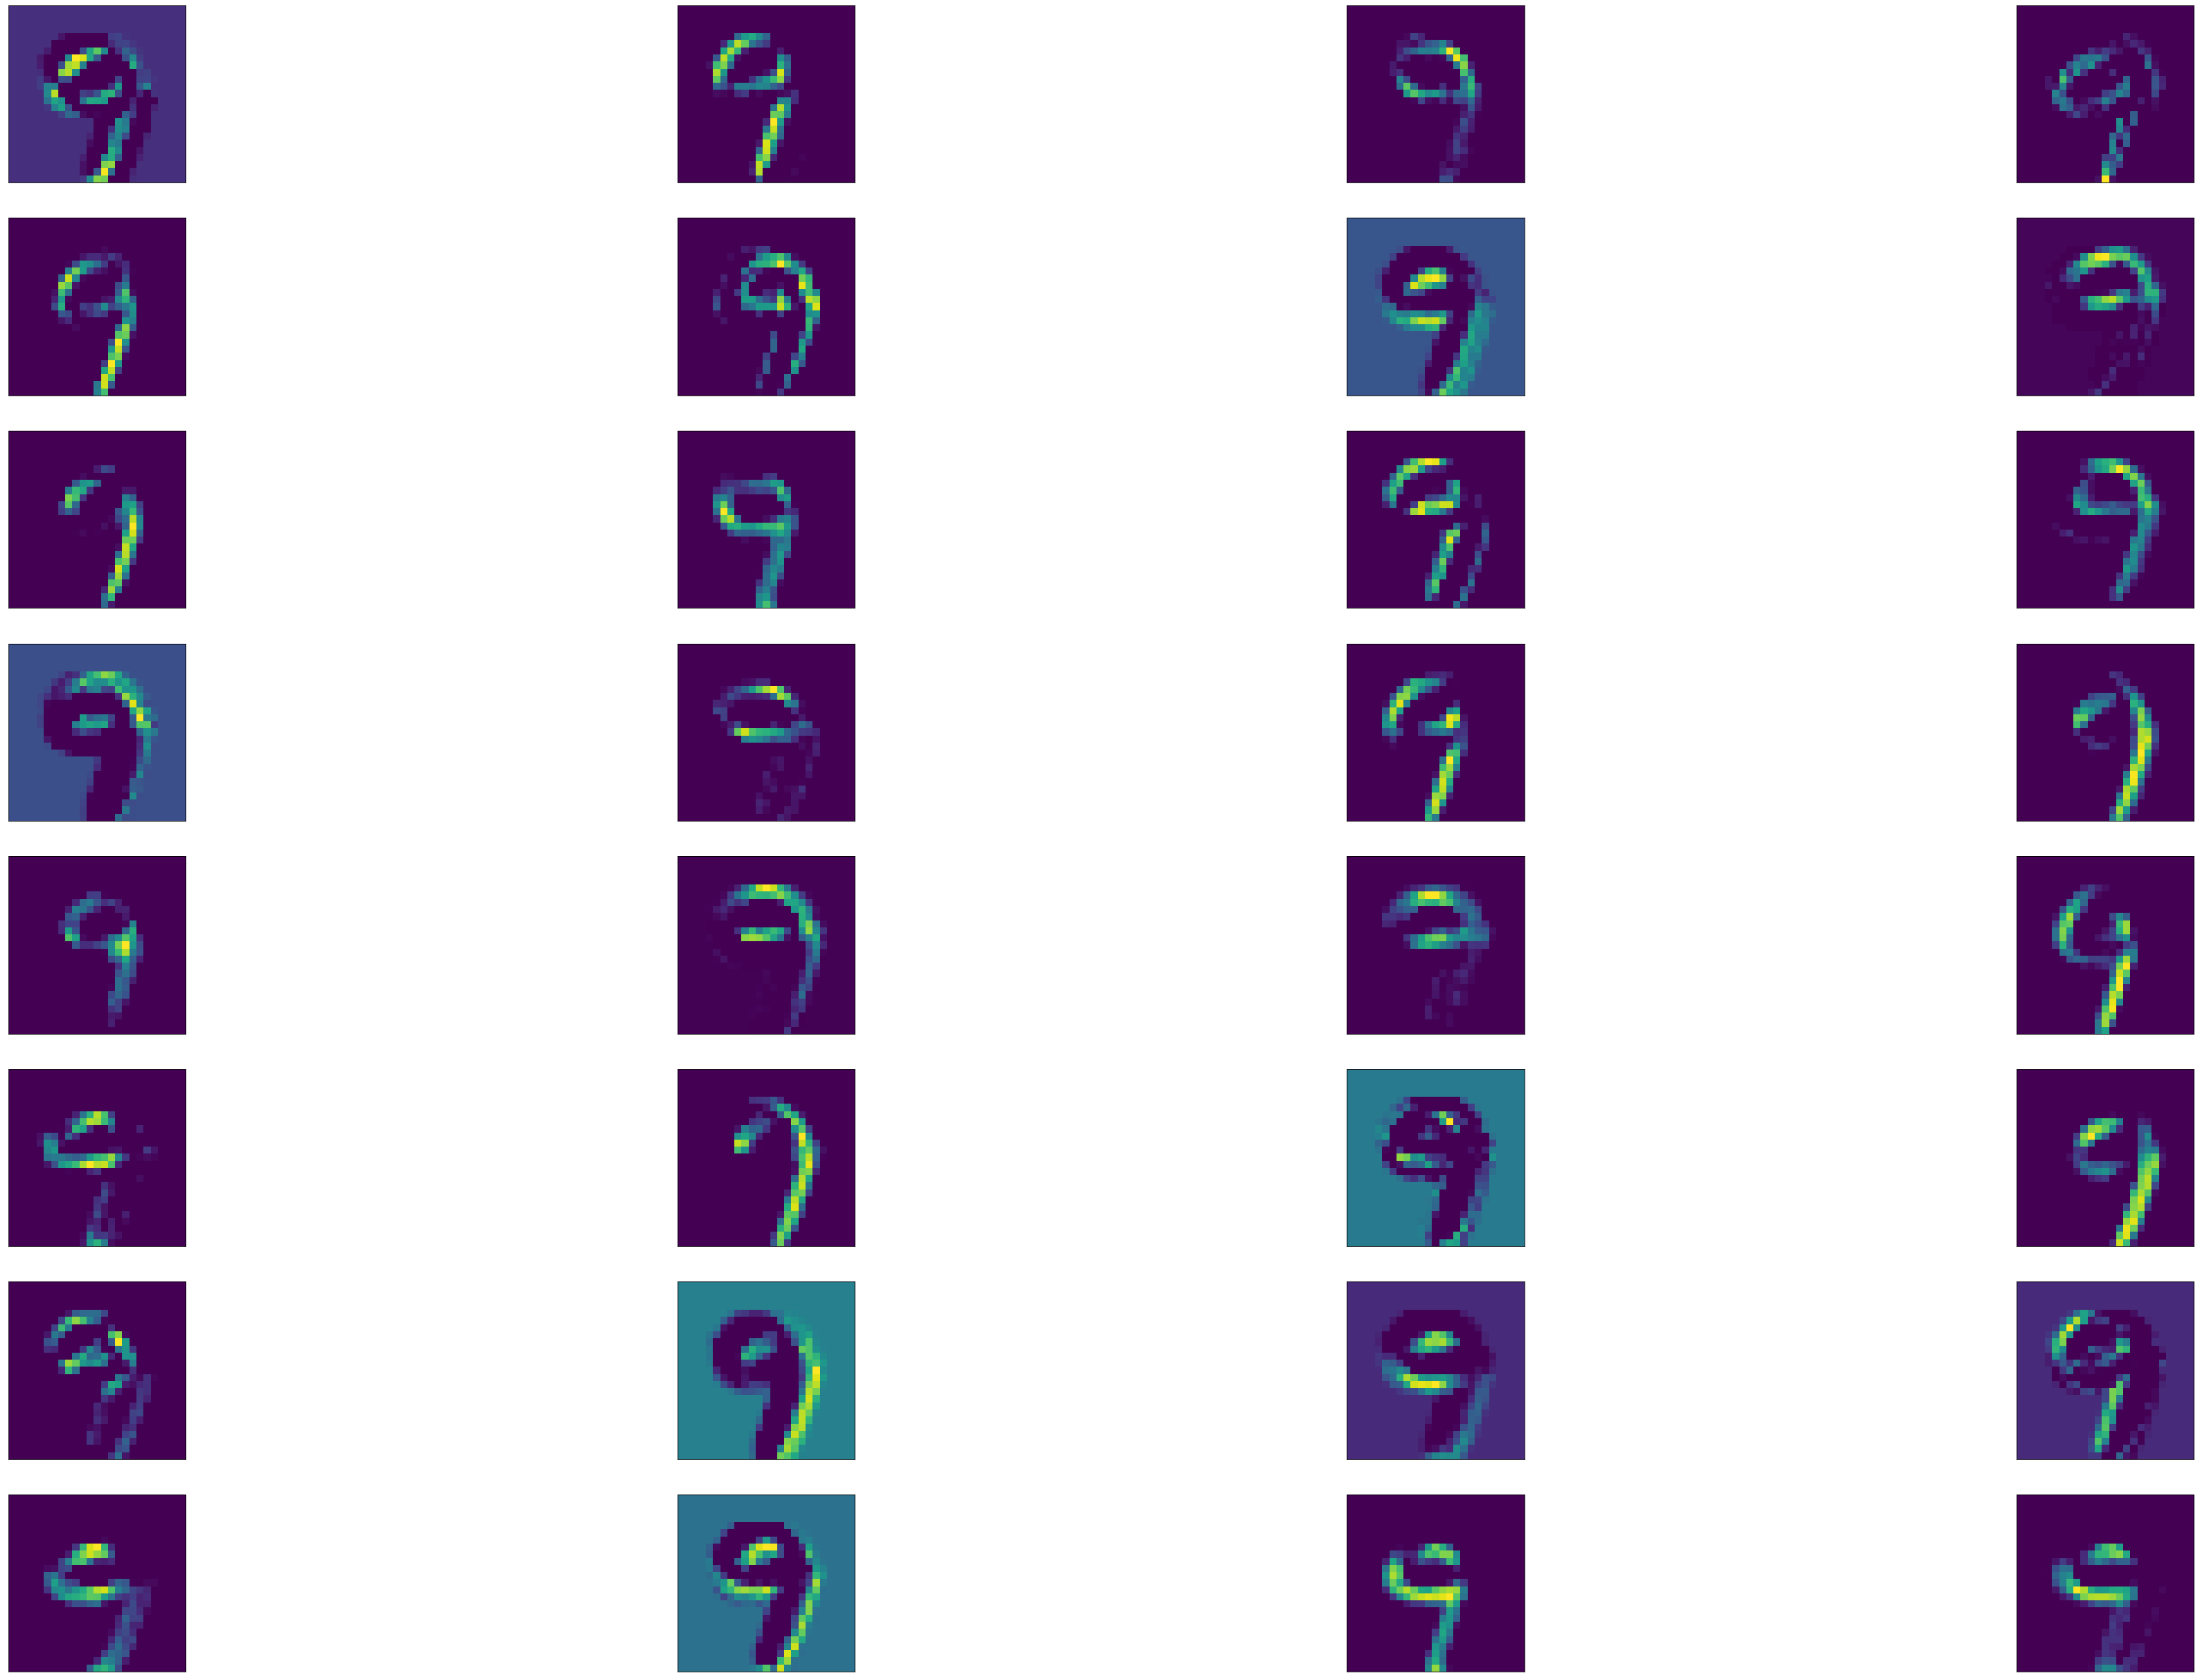

In [92]:
# plot all 32 maps in an 8x4 squares
ind = 1
plt.figure(figsize=(60, 40))
for _ in range(8):
    for _ in range(4):
        # specify subplot and turn of axis
        ax = plt.subplot(8, 4, ind)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ind-1])
        ind += 1
# show the figure
plt.show()

### SECOND LAYER (output = 1x11x11x64)

In [93]:
# redefine model to output right after the first hidden layer
second_cnn_layer_model = keras.Model(inputs=cnn_model.layers[0].output, outputs=cnn_model.layers[1].output)

In [94]:
feature_maps = second_cnn_layer_model.predict(feature_maps)

1/1 [==============================] - 0s 23ms/step


In [95]:
feature_maps.shape

(1, 11, 11, 64)

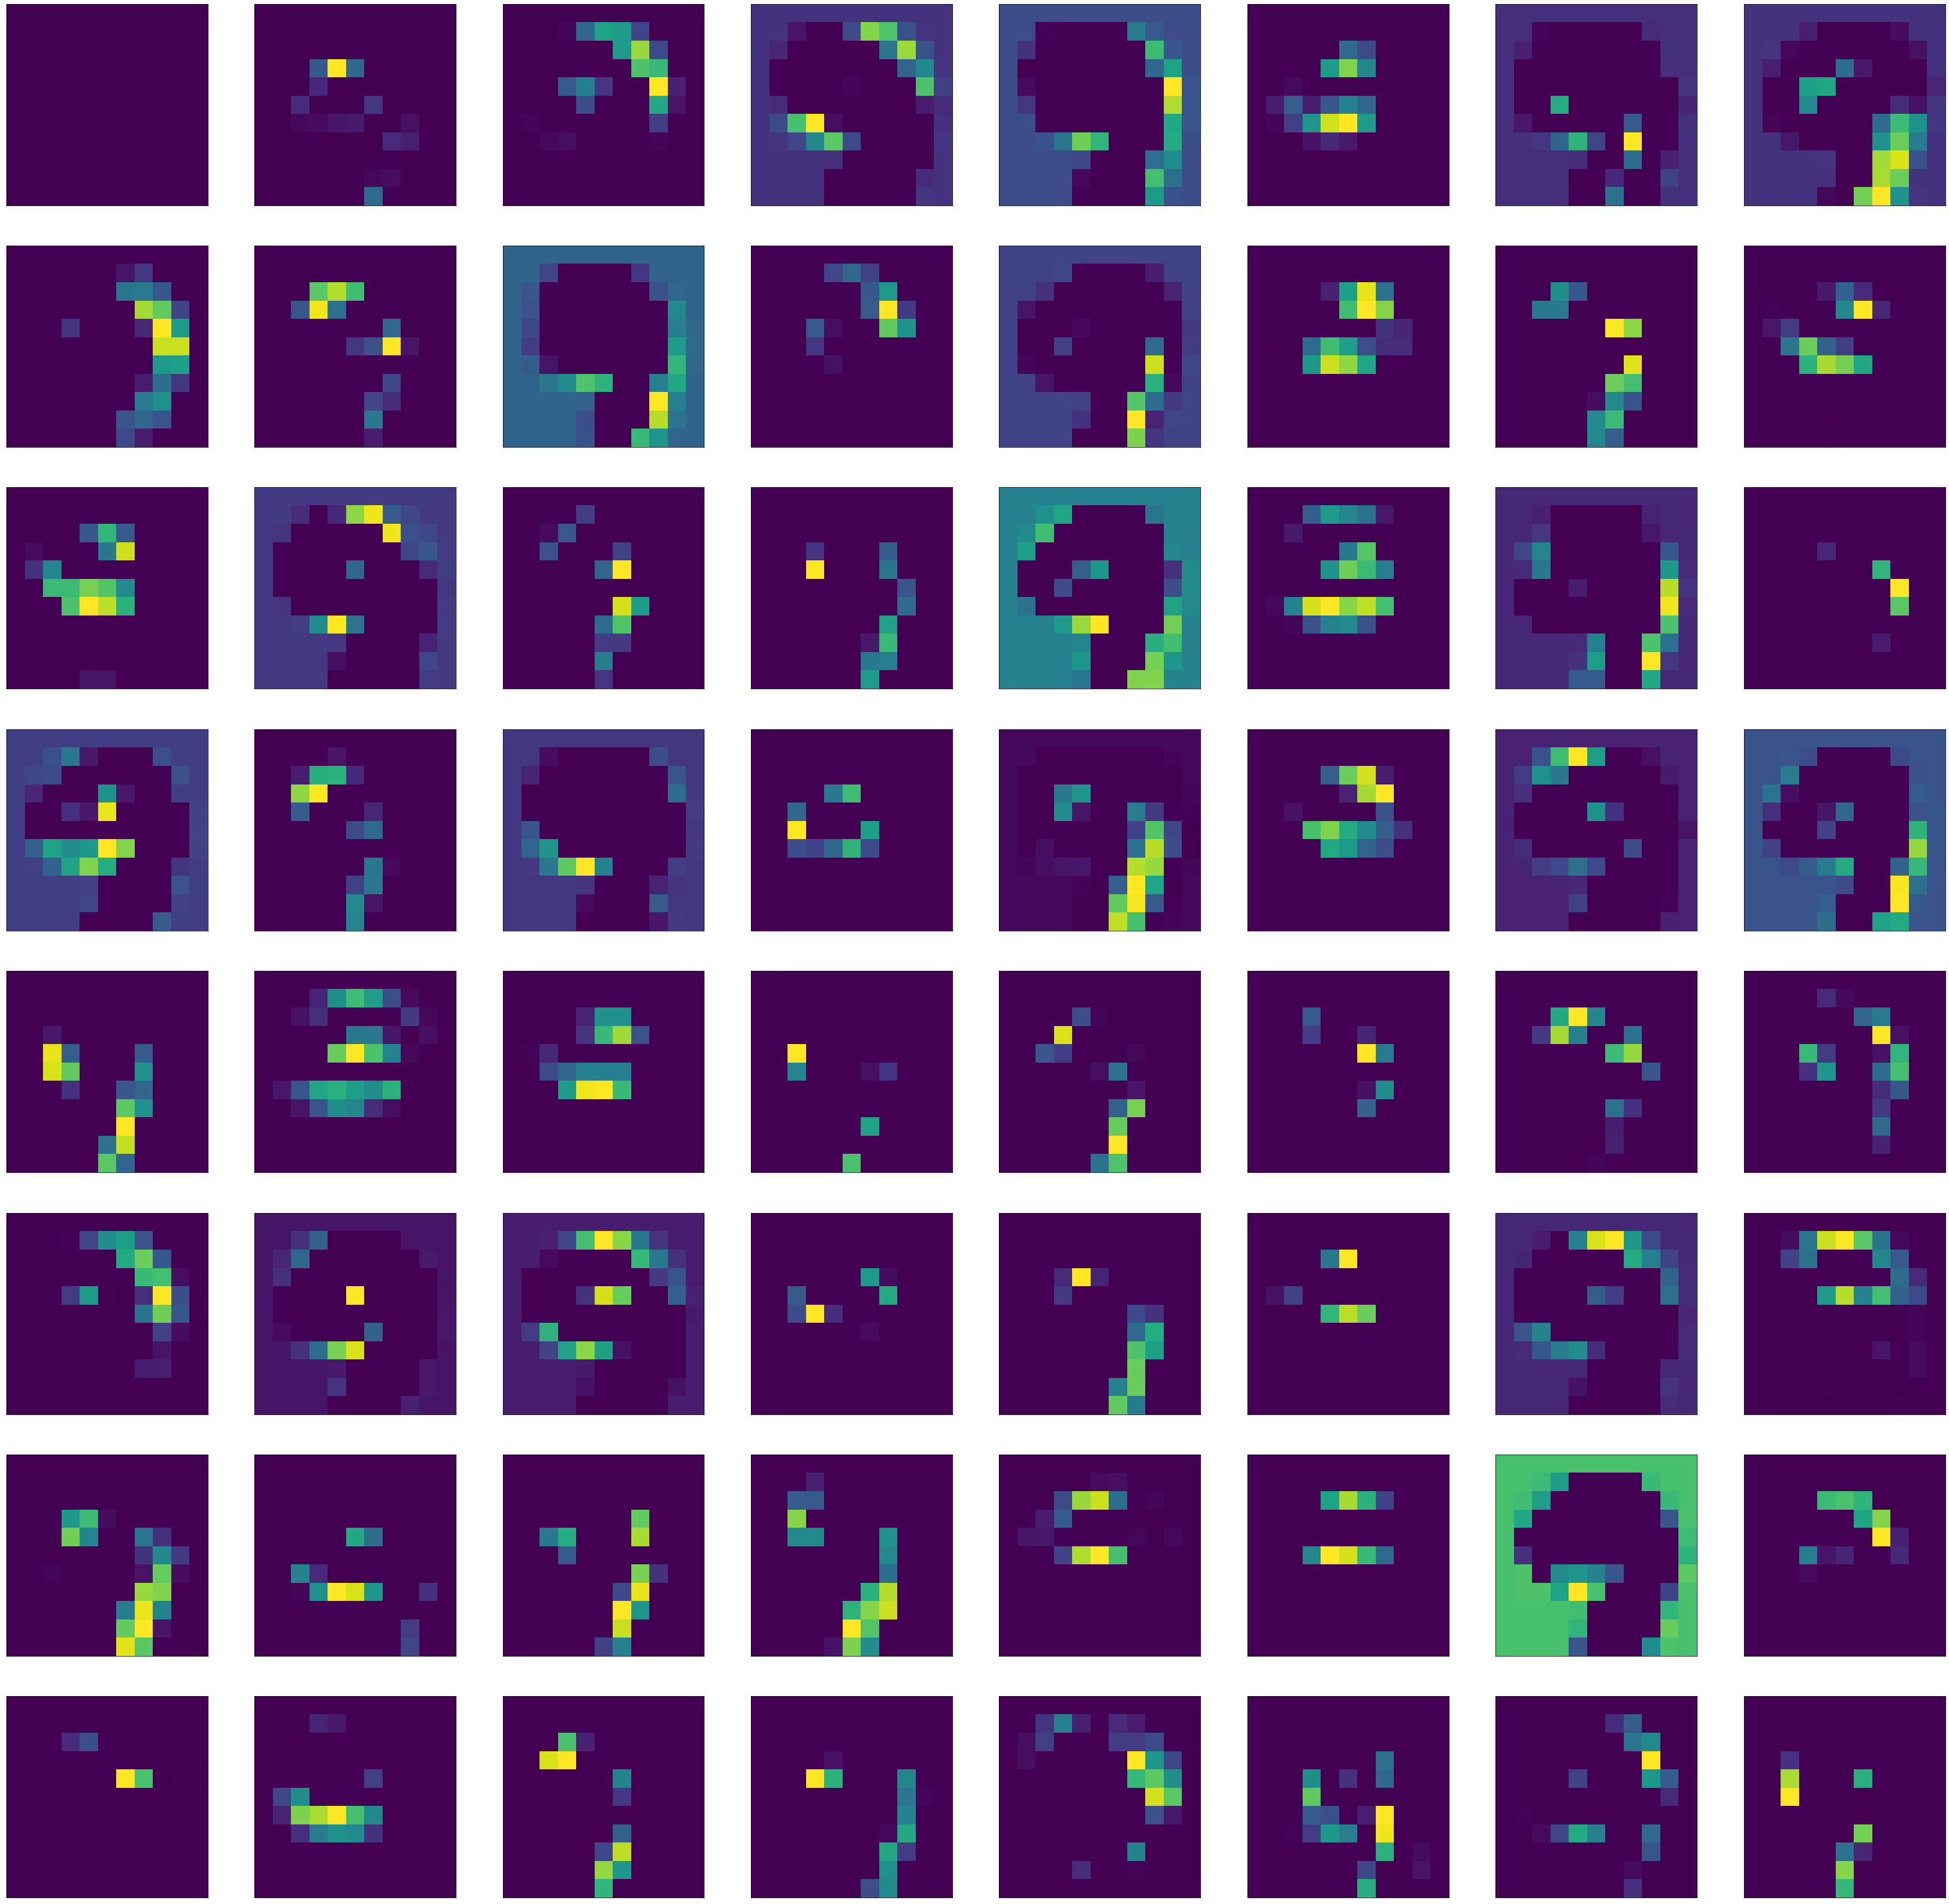

In [96]:
# plot all 32 maps in an 8x4 squares
ind = 1
plt.figure(figsize=(60, 60))
for _ in range(8):
    for _ in range(8):
        # specify subplot and turn of axis
        ax = plt.subplot(8, 8, ind)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ind-1])
        ind += 1
# show the figure
plt.show()

### THIRD LAYER (output = 1x4x4x128)

In [97]:
# redefine model to output right after the first hidden layer
third_cnn_layer_model = keras.Model(inputs=cnn_model.layers[1].output, outputs=cnn_model.layers[2].output)

In [98]:
feature_maps = third_cnn_layer_model.predict(feature_maps)

1/1 [==============================] - 0s 23ms/step


In [99]:
feature_maps.shape

(1, 4, 4, 128)

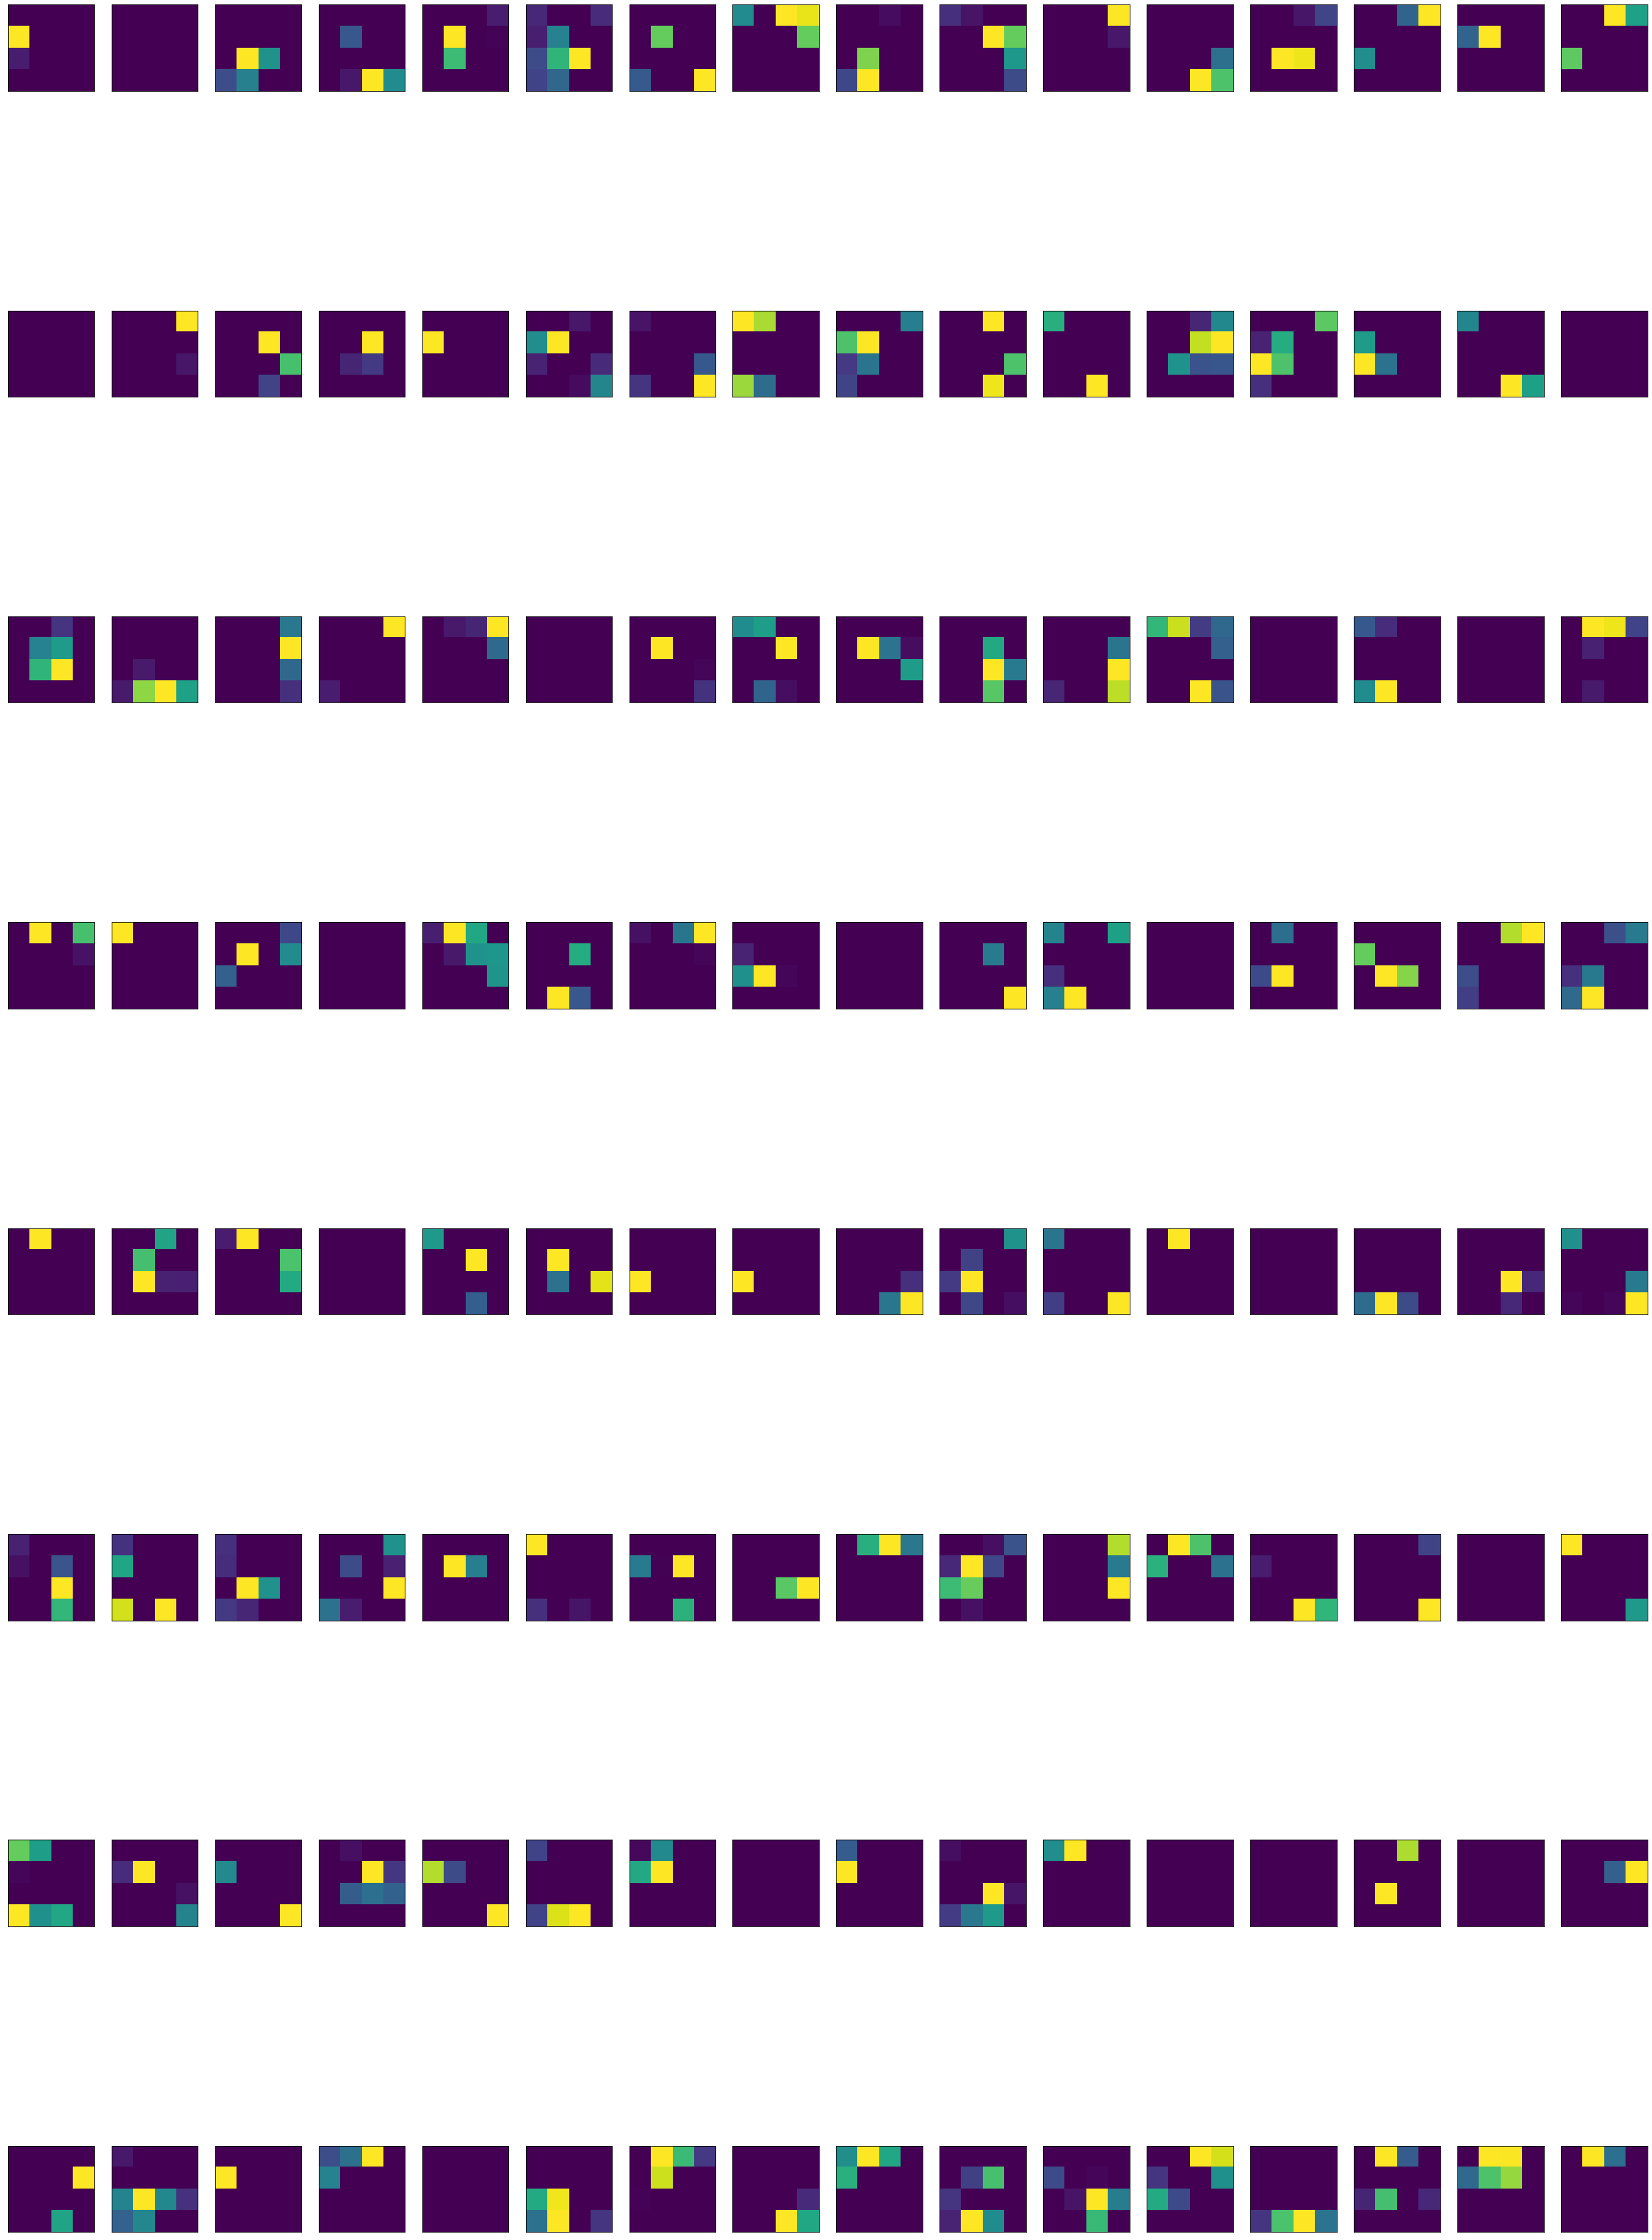

In [100]:
# plot all 32 maps in an 8x4 squares
ind = 1
plt.figure(figsize=(40, 60))
for _ in range(8):
    for _ in range(16):
        # specify subplot and turn of axis
        ax = plt.subplot(8, 16, ind)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ind-1])
        ind += 1
# show the figure
plt.show()